# ElecKart - Market Mix Modelling Project

## Business Objective

- To create a market mix model for ElecKart (an e-commerce firm based out of Ontario, Canada) for 3 product sub-categories - Camera Accessory, Gaming Accessory and Home Audio. 
- To observe the actual impact of various marketing variables over one year (July 2015 to June 2016) and recommend the optimal budget allocation for different marketing levers for the next year.

## 1. Importing & Understanding the Data

In [1]:
# importing all the required python libraries & packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import date, datetime

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [464]:
# Importing & reading the main dataset
ConsumerElectronics = pd.read_csv('ConsumerElectronics.csv')
ConsumerElectronics.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


#### It looks like the dataset has entries with '\N' & whitespaces. Hence, importing the data again by replacing these values as Null/NaN.

In [4]:
ConsumerElectronics = pd.read_csv("ConsumerElectronics.csv", na_values=['\\N', ' '])
ConsumerElectronics.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [5]:
ConsumerElectronics.shape

(1648824, 20)

In [6]:
ConsumerElectronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [7]:
#Count of orders for each of the sub categories
ConsumerElectronics.product_analytic_sub_category.value_counts()

Speaker                543928
CameraAccessory        239508
GamingAccessory        201899
TVVideoSmall           142995
HomeAudio              124860
Game                   114406
AudioMP3Player         112892
Camera                 101172
GamingConsole           29059
CameraStorage           17985
AudioAccessory          11713
HomeTheatre              4254
AmplifierReceiver        4056
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [8]:
#Count of orders for the required three sub categories
sub_cats = ['CameraAccessory','GamingAccessory','HomeAudio']
odrs = ConsumerElectronics[ConsumerElectronics['product_analytic_sub_category'].isin(sub_cats)]
odrs.shape

(566267, 20)

## 2. Data Cleaning & Preparation

In [9]:
# Lets find the percentage of unique orders for all sub categories by order_ID
unq_orders = len(ConsumerElectronics.drop_duplicates(subset = ["order_id"], keep = False))/len(ConsumerElectronics)*100
print("Percentage of unique orders for all the sub categories:", unq_orders)

Percentage of unique orders for all the sub categories: 83.02159599811745


This means that there are some duplicate entries in the dataset. Lets go ahead & delete them.

Dropping duplicates entries from the dataset on basis of order_date, order_id, order_item_id and number of units

In [10]:
ConsumerElectronics = ConsumerElectronics.drop_duplicates(subset = ["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = False)

In [11]:
ConsumerElectronics.shape

(1536296, 20)

In [12]:
# Applyying the necessary Data type conversion to fix the data format
ConsumerElectronics['order_datetime'] = pd.to_datetime(ConsumerElectronics['order_date'], format='%Y-%m-%d %H:%M:%S')

# Removing sceintific notation in the below columns
ConsumerElectronics['cust_id'] = ConsumerElectronics['cust_id'].apply(lambda x: '{:.0f}'.format(x))
ConsumerElectronics['order_id'] = ConsumerElectronics['order_id'].apply(lambda x: '{:.0f}'.format(x))
ConsumerElectronics['order_item_id'] = ConsumerElectronics['order_item_id'].apply(lambda x: '{:.0f}'.format(x))
ConsumerElectronics['pincode'] = ConsumerElectronics['pincode'].apply(lambda x: '{:.0f}'.format(x))

In [13]:
# Creating the order_date column from order_datetime column
ConsumerElectronics['order_date'] = ConsumerElectronics['order_datetime'].dt.date

In [14]:
# As per the inputs from business, filtering out the data for the dates which are lying beyond the scope of modelling i.e. July 2015 to June 2016
start_date = pd.to_datetime("2015-07-01").date()
end_date = pd.to_datetime("2016-06-30").date()
ConsumerElectronics = ConsumerElectronics.loc[(ConsumerElectronics['order_date']>=start_date) & (ConsumerElectronics['order_date']<=end_date)]

In [15]:
# As per the inputs from business, the modelling is to be done on weekly aggregated data. Hence, creating the order_week column
ConsumerElectronics['order_week'] = ConsumerElectronics['order_datetime'].dt.week

In [16]:
ConsumerElectronics.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,NaN,NaN,...,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,NaN,NaN,...,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,NaN,NaN,...,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,NaN,NaN,...,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,NaN,NaN,...,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


#### Null Values Treatment

In [17]:
# Percentage of Null values for each column
round(100*(ConsumerElectronics.isnull().sum()/len(ConsumerElectronics.index)),2).sort_values(ascending = False)

deliverybdays                      78.29
deliverycdays                      78.29
product_analytic_vertical           0.38
gmv                                 0.26
fsn_id                              0.00
pincode                             0.00
order_datetime                      0.00
product_procurement_sla             0.00
product_mrp                         0.00
product_analytic_sub_category       0.00
product_analytic_category           0.00
product_analytic_super_category     0.00
sla                                 0.00
cust_id                             0.00
order_date                          0.00
s1_fact.order_payment_type          0.00
units                               0.00
order_item_id                       0.00
order_id                            0.00
Month                               0.00
Year                                0.00
order_week                          0.00
dtype: float64

In [18]:
# Dropping the deliverybdays & deliverycdays columns as they consist of high %age of null values
ConsumerElectronics.drop(['deliverybdays', 'deliverycdays'], axis = 1, inplace = True)
ConsumerElectronics.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [19]:
# Moving to other columns
# product_analytic_vertical & gmv columns have very few null values. Hence, dropping the rows with those null values as it will not impact the overall dataset due to very small in count
ConsumerElectronics = ConsumerElectronics.loc[~pd.isnull(ConsumerElectronics['product_analytic_vertical'])]
ConsumerElectronics = ConsumerElectronics.loc[~pd.isnull(ConsumerElectronics['gmv'])]

In [20]:
round(100*(ConsumerElectronics.isnull().sum()/len(ConsumerElectronics.index)),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

So now we do not have any feature with null values, we can proceed with the next steps

In [21]:
# Reviewing & updating the order_week data to make it contineous
def ordWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

ConsumerElectronics['order_week'] = ConsumerElectronics.apply(lambda x: ordWeek(x['order_week'],x['Year']), axis = 1)

In [22]:
ConsumerElectronics.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [23]:
# dropping the transactions with product mrp is 0
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics.product_mrp != 0]

In [24]:
# dropping the transactions where gmv is 0. This is because imputation of gmv does not make sense & may affter the end model
ConsumerElectronics = ConsumerElectronics.loc[~(ConsumerElectronics.gmv == 0)]

In [25]:
# verifying the changes for gmv
len(ConsumerElectronics[ConsumerElectronics['gmv'] == 0.0])

0

In [26]:
# verifying the changes for product_mrp
len(ConsumerElectronics[ConsumerElectronics['product_mrp'] == 0.0])

0

In [27]:
# Dropping the records where gmv is grater than or equal to the mrp*units since this cannot be a possibility
ConsumerElectronics= ConsumerElectronics.loc[ConsumerElectronics.gmv <= (ConsumerElectronics.product_mrp * ConsumerElectronics.units)]

#### Outliers Treatment

In [28]:
# Below are the numeric columns
ConsumerElectronics.describe()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,order_week
count,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06
mean,2.015556e+03,6.411632e+00,2.495538e+03,1.021619e+00,5.683975e+00,4.214486e+03,5.269346e+00,5.556354e+01
std,4.968865e-01,3.690315e+00,5.677618e+03,2.504660e-01,2.998176e+00,8.686505e+03,5.209425e+01,1.354709e+01
min,2.015000e+03,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,4.900000e+01,-1.000000e+00,2.700000e+01
25%,2.015000e+03,3.000000e+00,3.390000e+02,1.000000e+00,4.000000e+00,8.000000e+02,1.000000e+00,4.400000e+01
50%,2.016000e+03,6.000000e+00,7.500000e+02,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00,5.600000e+01
75%,2.016000e+03,1.000000e+01,1.999000e+03,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00,6.700000e+01
max,2.016000e+03,1.200000e+01,2.269470e+05,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03,7.900000e+01


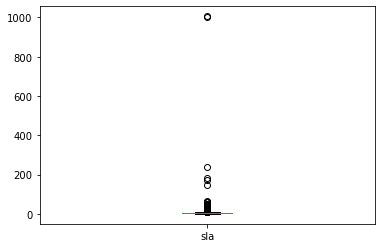

In [29]:
ConsumerElectronics['sla'].plot.box();

In [30]:
# where sla is more than 30 days
len(ConsumerElectronics.loc[ConsumerElectronics.sla>30])/len(ConsumerElectronics)

5.8388517193404915e-05

In [31]:
# Dropping these records as SLA of more than 30 days too rare & next to impossible
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics.sla<=30]

In [32]:
# Removing the records with negative values of product_procurement_sla
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics.product_procurement_sla>=0]

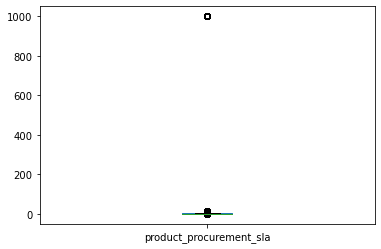

In [33]:
ConsumerElectronics['product_procurement_sla'].plot.box();

In [34]:
ConsumerElectronics['product_procurement_sla'].value_counts()/len(ConsumerElectronics.index)*100

2       34.043203
3       19.386683
1       19.342379
5       13.973453
4        7.662434
0        2.678575
6        1.010862
7        0.779668
15       0.426847
14       0.333542
1000     0.284962
13       0.033719
8        0.030985
9        0.005959
12       0.003996
10       0.002734
Name: product_procurement_sla, dtype: float64

In [35]:
# From the above observation, considering only those records where product_procurement_sla is less than or equal to 15 days. 
ConsumerElectronics = ConsumerElectronics.loc[ConsumerElectronics.product_procurement_sla<=15]

In [36]:
# Segmenting the datase for the required three sub-categories
ConsumerElectronics = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='GamingAccessory')|(ConsumerElectronics['product_analytic_sub_category']=='CameraAccessory')|(ConsumerElectronics['product_analytic_sub_category']=='HomeAudio')]

In [37]:
ConsumerElectronics.shape

(497561, 20)

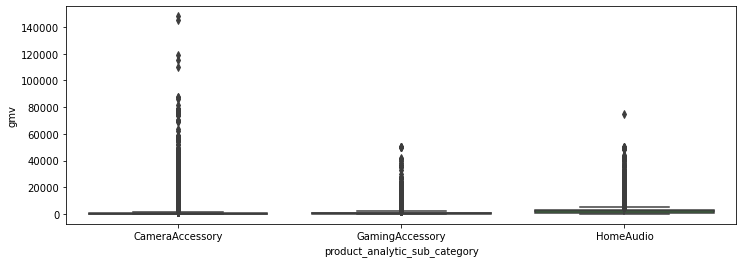

In [38]:
# Further Outlier analysis for GMV for each of the category
plt.figure(figsize = (12,4))
sns.boxplot(y = 'gmv',data = ConsumerElectronics, x = 'product_analytic_sub_category')
plt.show()

In [39]:
# Capping the gmv values for each of the categories to 0.95 quantile
cam_q95 = ConsumerElectronics.loc[(ConsumerElectronics.product_analytic_sub_category=='CameraAccessory')]['gmv'].quantile(0.95)
gam_q95 = ConsumerElectronics.loc[(ConsumerElectronics.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)
hom_q95 = ConsumerElectronics.loc[(ConsumerElectronics.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)

camera = ConsumerElectronics.loc[(ConsumerElectronics.product_analytic_sub_category=='CameraAccessory') & (ConsumerElectronics.gmv<cam_q95)]
gaming = ConsumerElectronics.loc[(ConsumerElectronics.product_analytic_sub_category=='GamingAccessory') & (ConsumerElectronics.gmv<gam_q95)]
homeaudio = ConsumerElectronics.loc[(ConsumerElectronics.product_analytic_sub_category=='HomeAudio') & (ConsumerElectronics.gmv<hom_q95)]

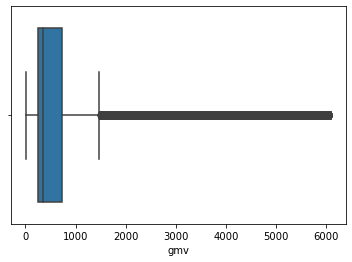

In [40]:
# Checking again the Outliers for GMV for each of the category
# For CameraAccessory
sns.boxplot(camera['gmv']);

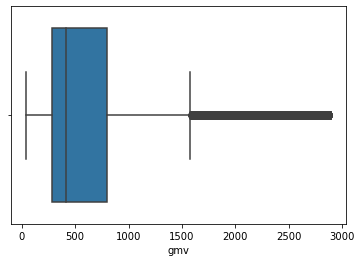

In [41]:
# For GamingAccessory
sns.boxplot(gaming['gmv']);

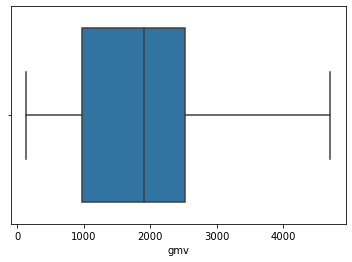

In [42]:
# For HomeAudio
sns.boxplot(homeaudio['gmv']);

In [43]:
# Now, lets concat the three categoris to a single dataframe
ConsumerElectronics = pd.concat([camera, gaming, homeaudio], axis = 0)

In [44]:
ConsumerElectronics.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,3419188825145600,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,-1919052697560310016,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,42
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,3418428515041500,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,6404913202077570048,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,42


In [45]:
ConsumerElectronics.shape

(472664, 20)

In [46]:
# Dropping all the columns which are of no use for modelling
ConsumerElectronics.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'], inplace = True, axis = 1)

In [47]:
# Converting the data type of week, month & year to integer
ConsumerElectronics['Year'] = ConsumerElectronics['Year'].astype('int')
ConsumerElectronics['Month'] = ConsumerElectronics['Month'].astype('int')
ConsumerElectronics['order_week'] = ConsumerElectronics['order_week'].astype('int')

## 3. Exploratory Data Analyisis

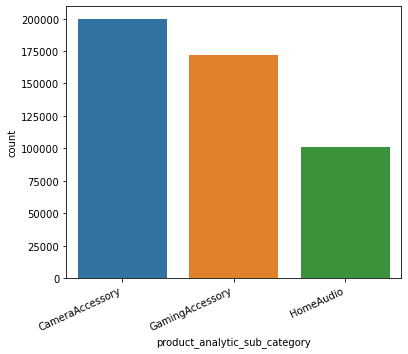

In [48]:
# visualize the count of transaction across each category
plt.figure(figsize = (6,5))
ax = sns.countplot(ConsumerElectronics['product_analytic_sub_category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
sns.set_context(font_scale = 3)

INSIGHTs:
- From the above plot we can see that the maximum orders were placed for Camera Accessory followed by Gaming Accessory & then Home Audio

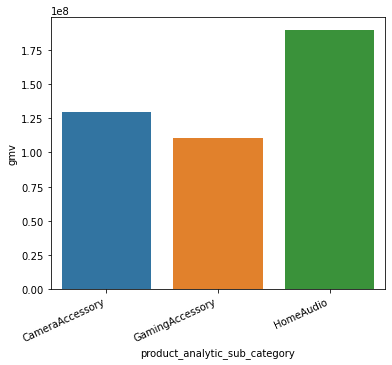

In [49]:
# Plot to visualize the revenue across each category
total_revenue= ConsumerElectronics.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (6,5))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=total_revenue)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
sns.set_context(font_scale = 2.5)

INSIGHTs:
- From the above plot, we can see that the highest revenue was received from Home Audio followed by Camera Accessory & then Gamming Accessory

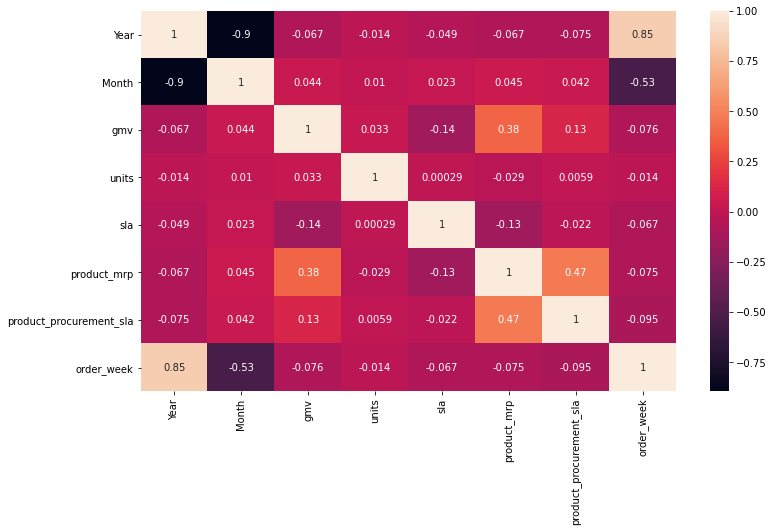

In [50]:
# Lets look at the Correlation Matrix for all the numerical features
plt.figure(figsize = (12,7))
sns.heatmap(ConsumerElectronics.corr(), annot=True)
plt.show()

INSIGHTs:
- From the above Correlation Matrix, we can see that there is a high correlation between -> Month & Year and order_week & Year.
- There is also a moderate correlation between -> product_mrp & product_procurement_sla and GMV & product_mrp

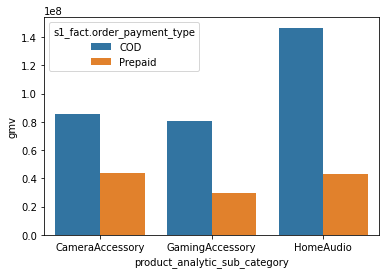

In [51]:
# Plotting & analysing the GMV(revenue) by payment type for each of the product category.
gmv_by_paymentType = ConsumerElectronics.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=gmv_by_paymentType)
plt.show()

INSIGHTs:
- From the above plot, we can see that the highest revenue generated by COD orders was from Home Audio followed by Camera Accessory and then Gaming Accessory.
- For the Prepaid orders, the highest revenue was generated from Camera Accessory, followed by Home Audio and then Gaming Accessory.

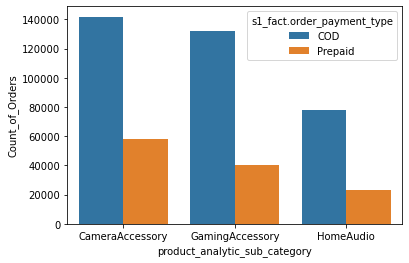

In [52]:
# Plotting & analysing the count of orders for each of the sub-categories by Payment Type
orders_by_PaymentType = ConsumerElectronics.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'Count_of_Orders'})
sns.barplot(x='product_analytic_sub_category', y='Count_of_Orders', hue="s1_fact.order_payment_type", data=orders_by_PaymentType)
plt.show()

INSIGHTs:
- From the above visualizaton, we can observe that the highest count of orders was generated from the Camera Accessory followed by Gaming Accessory and then Home Audio for both the payment types.

In [53]:
# Segregating & creating seperate datasets for each of the three product sub categories
gamingAcc = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
cameraAcc = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
homeAudio = ConsumerElectronics[(ConsumerElectronics['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)

In [54]:
gamingAcc.shape

(172311, 14)

In [55]:
cameraAcc.shape

(199598, 14)

In [56]:
homeAudio.shape

(100755, 14)

## 4. Feature Engineering - Deriving the KPIs

In [57]:
# The below function will take dataframe of order dates and gives the total special and payment dates for each week
def DictToDF(valsList, ColName):
    df = pd.DataFrame(valsList)
    df[ColName] = pd.to_datetime(df[ColName]).dt.date
    df["total_"+ColName+"s"] = 1
    df['order_week'] = pd.to_datetime(df[ColName]).dt.week
    df['year'] = pd.to_datetime(df[ColName]).dt.year
    df['order_week'] = df.apply(lambda x: ordWeek(x['order_week'],x['year']), axis = 1)
    df = df.groupby('order_week').sum()
    df["is_"+ColName] = 1
    df.drop('year', axis = 1, inplace = True)
    return df

In [58]:
# Defining the KPIs
def defineKPIs(df):
# Payment_mode
    df['payment_mode'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
    
# Selling_price of each product
    df['selling_price'] = df['gmv']/df['units']
    
# Discount offered on each product
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)
    
    return df

In [59]:
# Defining the additional KPIs for weekly aggregated columns
def weeklyAggCols():

# Total Holidays
    holidays = {'holiday':["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06", 
            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03", 
            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = DictToDF(holidays,"holiday")

# Total number of Special sale days
    special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = DictToDF(special_sale_days,'special_sale_day')

# Total pay days
    pay_days = {'pay_day':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    pay_days_df = DictToDF(pay_days,'pay_day')
    final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df],axis = 1)
    return final_df.fillna(0).astype('int')

In [60]:
weeklyAggCols()

,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
order_week,,,,,,
27,1,1,0,0,1,1
29,0,0,2,1,1,1
31,0,0,0,0,1,1
32,1,1,0,0,0,0
33,0,0,2,1,1,1
34,0,0,1,1,0,0
35,0,0,3,1,0,0
36,0,0,0,0,1,1
37,1,1,0,0,0,0


In [61]:
# Adding the first three KPIs to each of the dataset
gamingAcc = defineKPIs(gamingAcc)
cameraAcc = defineKPIs(cameraAcc)
homeAudio = defineKPIs(homeAudio)

In [62]:
gamingAcc.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount
1599,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,GamePad,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31
1601,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,GamePad,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35
1602,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,GamePad,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31
1603,2015-10-16,2015,10,4417730112316700,2750.0,1,Prepaid,7,2297791966161220096,GamePad,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31
1607,2015-10-04,2015,10,4408070947414700,2750.0,1,COD,7,4371929922837940224,GamePad,3999,5,2015-10-04 15:19:00,40,0,2750.0,0.31


In [63]:
gamingAcc.shape

(172311, 17)

In [64]:
cameraAcc.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount
2,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,CameraTripod,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05
3,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,CameraTripod,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19
4,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,CameraTripod,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23
5,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,CameraTripod,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18
6,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,CameraTripod,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09


In [65]:
cameraAcc.shape

(199598, 17)

In [66]:
homeAudio.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount
2870,2015-10-08,2015,10,1411753777965600,3700.0,1,COD,3,8628124667745449984,HomeAudioSpeaker,4599,0,2015-10-08 21:34:04,41,0,3700.0,0.20
2871,2015-10-11,2015,10,2414104375842400,3700.0,1,COD,5,5684936202558919680,HomeAudioSpeaker,4599,0,2015-10-11 16:54:52,41,0,3700.0,0.20
2872,2015-10-08,2015,10,4411629266828400,3700.0,1,COD,3,-1123729755469779968,HomeAudioSpeaker,4599,0,2015-10-08 18:06:04,41,0,3700.0,0.20
5960,2015-10-01,2015,10,2405684398213000,2159.0,1,Prepaid,6,8509075186971020288,HomeAudioSpeaker,2800,5,2015-10-01 21:02:49,40,1,2159.0,0.23
5961,2015-10-26,2015,10,3427126275487100,2159.0,1,COD,5,349030327610672000,HomeAudioSpeaker,2800,5,2015-10-26 16:41:40,44,0,2159.0,0.23


In [67]:
homeAudio.shape

(100755, 17)

In [68]:
# Defining KPIs for product analytical vertical
# 1. Camera Accessory
prdVert_cam = cameraAcc.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
cam_prdKPI = prdVert_cam.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = cam_prdKPI.columns
cam_prdKPI[cols] = cam_prdKPI[cols].apply(pd.to_numeric, errors='coerce')
cameraAcc = cameraAcc.drop(['product_analytic_vertical'],axis=1)

In [69]:
# Counting the products sold for each vertical within Camera Accessory
cam_units_sold = prdVert_cam.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
cam_units_sold.head()

,product_analytic_vertical,units
15,Flash,48003
3,CameraBattery,35974
12,CameraTripod,31268
17,Lens,22800
2,CameraBag,15279


In [70]:
# Defining KPIs for product analytical vertical
# 2. Gaming Accessory
prdVert_gam = gamingAcc.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
gam_prdKPI = prdVert_gam.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")
cols = gam_prdKPI.columns
gam_prdKPI[cols] = gam_prdKPI[cols].apply(pd.to_numeric, errors='coerce')
gamingAcc = gamingAcc.drop(['product_analytic_vertical'],axis=1)

In [71]:
# Counting the products sold for each vertical within Gaming Accessory
gam_units_sold = prdVert_gam.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
gam_units_sold.head()

,product_analytic_vertical,units
6,GamingHeadset,59210
2,GamePad,48028
9,GamingMouse,34759
3,GamingAccessoryKit,8149
14,TVOutCableAccessory,6657


In [72]:
# Defining KPIs for product analytical vertical
# 2. Home Audio
prdVert_hom = homeAudio.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
hom_prdKPI = prdVert_hom.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")
cols = hom_prdKPI.columns
hom_prdKPI[cols] = hom_prdKPI[cols].apply(pd.to_numeric, errors='coerce')
homeAudio = homeAudio.drop(['product_analytic_vertical'],axis=1)

In [73]:
# Counting the products sold for each vertical within Home Audio
hom_units_sold = prdVert_hom.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
hom_units_sold.head()

,product_analytic_vertical,units
6,HomeAudioSpeaker,72464
4,FMRadio,21132
9,VoiceRecorder,2650
0,BoomBox,1944
2,Dock,1883


Defining KPI for Premium Product category.    
Setting the cut-off as 75 percentile for premium products as per their GMV

In [74]:
cameraAcc['gmv'].describe()

count    199598.00000
mean        648.75979
std         781.57022
min          10.00000
25%         248.00000
50%         349.00000
75%         739.00000
max        6078.00000
Name: gmv, dtype: float64

In [75]:
cam_q75 = cameraAcc['gmv'].quantile(0.75)
cameraAcc['premium_product'] = cameraAcc['gmv'].apply(lambda x:1 if (x>cam_q75) else 0)
cameraAcc.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
2,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05,1
3,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19,1
4,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23,1
5,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18,1
6,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09,1


In [76]:
gamingAcc['gmv'].describe()

count    172311.000000
mean        642.332905
std         566.351112
min          39.000000
25%         279.000000
50%         417.000000
75%         799.000000
max        2889.000000
Name: gmv, dtype: float64

In [77]:
gam_q75 = gamingAcc['gmv'].quantile(0.75)
gamingAcc['premium_product'] = gamingAcc['gmv'].apply(lambda x:1 if (x>gam_q75) else 0)
gamingAcc.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
1599,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31,1
1601,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35,1
1602,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31,1
1603,2015-10-16,2015,10,4417730112316700,2750.0,1,Prepaid,7,2297791966161220096,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31,1
1607,2015-10-04,2015,10,4408070947414700,2750.0,1,COD,7,4371929922837940224,3999,5,2015-10-04 15:19:00,40,0,2750.0,0.31,1


In [78]:
homeAudio['gmv'].describe()

count    100755.000000
mean       1881.447037
std         976.982316
min         129.000000
25%         975.000000
50%        1899.000000
75%        2525.000000
max        4704.000000
Name: gmv, dtype: float64

In [79]:
hom_q75 = homeAudio['gmv'].quantile(0.75)
homeAudio['premium_product'] = homeAudio['gmv'].apply(lambda x:1 if (x>hom_q75) else 0)
homeAudio.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
2870,2015-10-08,2015,10,1411753777965600,3700.0,1,COD,3,8628124667745449984,4599,0,2015-10-08 21:34:04,41,0,3700.0,0.20,1
2871,2015-10-11,2015,10,2414104375842400,3700.0,1,COD,5,5684936202558919680,4599,0,2015-10-11 16:54:52,41,0,3700.0,0.20,1
2872,2015-10-08,2015,10,4411629266828400,3700.0,1,COD,3,-1123729755469779968,4599,0,2015-10-08 18:06:04,41,0,3700.0,0.20,1
5960,2015-10-01,2015,10,2405684398213000,2159.0,1,Prepaid,6,8509075186971020288,2800,5,2015-10-01 21:02:49,40,1,2159.0,0.23,0
5961,2015-10-26,2015,10,3427126275487100,2159.0,1,COD,5,349030327610672000,2800,5,2015-10-26 16:41:40,44,0,2159.0,0.23,0


#### Importing NPS + Stock Index data and merging them with the dataset for each product category

In [80]:
# Importing media data from the excel file & renaming the columns
nps_stock = pd.read_excel("Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 0).T.reset_index()
nps_stock = nps_stock[1:13].reset_index(drop=True)
nps_stock.columns = ['DT', 'NPS', 'Stock Index']
nps_stock

,DT,NPS,Stock Index
0,July'15,54.599588,1177.0
1,Aug'15,59.987101,1206.0
2,Sept'15,46.925419,1101.0
3,Oct'15,44.398389,1210.0
4,Nov'15,47.0,1233.0
5,Dec'15,45.8,1038.0
6,Jan'16,47.093031,1052.0
7,Feb'16,50.327406,1222.0
8,Mar'16,49.02055,1015.0
9,Apr'16,51.827605,1242.0


In [81]:
nps_stock.shape

(12, 3)

In [82]:
nps_stock['Year']=[2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016]
nps_stock['Month']=[7,8,9,10,11,12,1,2,3,4,5,6]
nps_stock.drop('DT',axis=1,inplace=True)
nps_stock

,NPS,Stock Index,Year,Month
0,54.599588,1177.0,2015,7
1,59.987101,1206.0,2015,8
2,46.925419,1101.0,2015,9
3,44.398389,1210.0,2015,10
4,47.0,1233.0,2015,11
5,45.8,1038.0,2015,12
6,47.093031,1052.0,2016,1
7,50.327406,1222.0,2016,2
8,49.02055,1015.0,2016,3
9,51.827605,1242.0,2016,4


In [83]:
nps_stock['NPS'] = nps_stock['NPS'].astype('float')

In [84]:
nps_stock['Stock Index'] = nps_stock['Stock Index'].astype('float')

In [85]:
nps_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPS          12 non-null     float64
 1   Stock Index  12 non-null     float64
 2   Year         12 non-null     int64  
 3   Month        12 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 512.0 bytes


In [86]:
# Adding the NPS feature/KPI to each of the three products category datasets
gamingAcc = pd.merge(nps_stock,gamingAcc,on=['Month','Year'],how='inner')
cameraAcc = pd.merge(nps_stock,cameraAcc,on=['Month','Year'],how='inner')
homeAudio = pd.merge(nps_stock,homeAudio,on=['Month','Year'],how='inner')

In [87]:
gamingAcc.head()

,NPS,Stock Index,Year,Month,order_date,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
0,54.599588,1177.0,2015,7,2015-07-10,169460596,2800.0,1,Prepaid,9,8996931547933859840,3999,5,2015-07-10 22:22:38,28,1,2800.0,0.30,1
1,54.599588,1177.0,2015,7,2015-07-20,173845985,2700.0,1,COD,7,1095002556734790016,3999,5,2015-07-20 09:47:28,30,0,2700.0,0.32,1
2,54.599588,1177.0,2015,7,2015-07-26,176570219,2679.0,1,Prepaid,5,-8900627232445830144,3999,5,2015-07-26 20:26:01,30,1,2679.0,0.33,1
3,54.599588,1177.0,2015,7,2015-07-08,168513415,2789.0,1,Prepaid,7,6515060272718419968,3999,5,2015-07-08 23:17:31,28,1,2789.0,0.30,1
4,54.599588,1177.0,2015,7,2015-07-17,172787973,2884.0,1,COD,6,-7661168602558889984,3999,5,2015-07-17 20:47:03,29,0,2884.0,0.28,1


### Weekly Aggregation of datasets

In [88]:
# Gaming Accessory
# Aggregating weekly by either summing up or taking mean wherever relevant

gamingAcc_sum = gamingAcc[['gmv','units','order_week']].groupby('order_week').sum()
gamingAcc_mean = gamingAcc[['sla','product_procurement_sla','order_week','product_mrp','selling_price','NPS','discount']].groupby('order_week').mean()
gamingAcc_count = gamingAcc[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumn_products'})

gamingAcc_final = pd.concat([gamingAcc_sum,gamingAcc_mean,gamingAcc_count], axis = 1).reset_index()

In [89]:
# Merging with weekly aggregate columns
gamingAcc_final = pd.merge(gamingAcc_final, weeklyAggCols().reset_index(), on = 'order_week', how = 'left').fillna(0)

In [90]:
# Merging with Product Analytical Vertical column
gamingAcc_final = pd.merge(gamingAcc_final,gam_prdKPI,on=['order_week'],how='left')

In [91]:
gamingAcc_final.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,...,GamingChargingStation,GamingHeadset,GamingKeyboard,GamingMemoryCard,GamingMouse,GamingMousePad,GamingSpeaker,JoystickGamingWheel,MotionController,TVOutCableAccessory
0,27,2.234400e+04,24,3.458333,3.208333,3504.125000,931.000000,54.599588,0.316250,24,...,0.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
1,28,1.866719e+06,2767,5.375094,3.245660,1667.559623,685.125660,54.599588,0.421543,2650,...,0.0,177.0,424.0,36.0,966.0,55.0,0.0,11.0,16.0,73.0
2,29,1.585166e+06,2704,5.268747,2.721119,1638.086745,630.567636,54.599588,0.451228,2467,...,0.0,179.0,162.0,27.0,357.0,48.0,0.0,8.0,11.0,92.0
3,30,1.722134e+06,2231,5.459259,2.592130,2139.344907,784.834954,54.599588,0.398009,2160,...,0.0,283.0,170.0,28.0,448.0,67.0,0.0,9.0,11.0,93.0
4,31,1.298391e+06,1619,5.713094,3.237484,5311.397304,816.840180,54.603046,0.464647,1558,...,0.0,424.0,71.0,11.0,232.0,39.0,1.0,17.0,8.0,79.0


In [92]:
gamingAcc_final.shape

(53, 32)

In [93]:
# Camera Accessory
# Aggregating weekly by either summing up or taking mean wherever relevant

cameraAcc_sum = cameraAcc[['gmv','units','order_week']].groupby('order_week').sum()
cameraAcc_mean = cameraAcc[['sla','product_procurement_sla','order_week','product_mrp','selling_price','NPS','discount']].groupby('order_week').mean()
cameraAcc_count = cameraAcc[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumn_products'})

cameraAcc_final = pd.concat([cameraAcc_sum,cameraAcc_mean,cameraAcc_count], axis = 1).reset_index()

In [94]:
# Merging with weekly aggregate columns
cameraAcc_final = pd.merge(cameraAcc_final, weeklyAggCols().reset_index(), on = 'order_week', how = 'left').fillna(0)

In [95]:
# Merging with Product Analytical Vertical column
cameraAcc_final = pd.merge(cameraAcc_final,cam_prdKPI,on=['order_week'],how='left')

In [96]:
cameraAcc_final.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,15375.0,25,2.280000,2.960000,1456.840000,615.000000,54.599588,0.525600,25,...,13.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,28,2019042.0,2752,7.156274,2.742586,1646.428137,751.233460,54.599588,0.462194,2630,...,433.0,0.0,226.0,17.0,0.0,366.0,0.0,0.0,13.0,16.0
2,29,2249245.0,2917,6.491321,2.764789,1630.936238,783.509033,54.599588,0.465349,2823,...,491.0,0.0,188.0,23.0,0.0,382.0,0.0,0.0,24.0,22.0
3,30,2105858.0,2888,6.488138,2.831776,1560.504313,740.930625,54.599588,0.455913,2782,...,457.0,0.0,194.0,18.0,0.0,423.0,0.0,0.0,23.0,30.0
4,31,1426134.0,1932,6.470684,2.777959,1524.232356,756.820304,54.605438,0.450456,1842,...,363.0,0.0,112.0,26.0,0.0,233.0,0.0,0.0,23.0,13.0


In [97]:
cameraAcc_final.shape

(52, 39)

In [98]:
# Home Audio
# Aggregating weekly by either summing up or taking mean wherever relevant

homeAudio_sum = homeAudio[['gmv','units','order_week']].groupby('order_week').sum()
homeAudio_mean = homeAudio[['sla','product_procurement_sla','order_week','product_mrp','selling_price','NPS','discount']].groupby('order_week').mean()
homeAudio_count = homeAudio[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumn_products'})

homeAudio_final = pd.concat([homeAudio_sum,homeAudio_mean,homeAudio_count], axis = 1).reset_index()

In [99]:
# Merging with weekly aggregate columns
homeAudio_final = pd.merge(homeAudio_final, weeklyAggCols().reset_index(), on = 'order_week', how = 'left').fillna(0)

In [100]:
# Merging with Product Analytical Vertical column
homeAudio_final = pd.merge(homeAudio_final,hom_prdKPI,on=['order_week'],how='left')

In [101]:
homeAudio_final.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,27,7.366000e+04,32,3.093750,3.718750,4108.406250,2301.875000,54.599588,0.384688,32,...,4.0,0.0,0.0,0.0,2.0,0.0,26.0,0.0,0.0,0.0
1,28,3.394594e+06,1888,7.618513,2.797753,3024.204387,1810.233886,54.599588,0.335811,1869,...,60.0,0.0,30.0,1.0,478.0,13.0,1281.0,0.0,0.0,25.0
2,29,4.012062e+06,2204,7.157391,2.723084,3158.978558,1824.581204,54.599588,0.349612,2192,...,57.0,0.0,50.0,1.0,532.0,27.0,1511.0,0.0,0.0,26.0
3,30,3.560271e+06,2004,7.137966,2.802618,3155.295065,1781.471803,54.599588,0.348036,1986,...,65.0,0.0,56.0,0.0,509.0,20.0,1332.0,0.0,0.0,22.0
4,31,2.588403e+06,1419,7.291076,2.683428,3180.561615,1827.348442,54.599588,0.345241,1412,...,37.0,0.0,44.0,0.0,372.0,11.0,939.0,0.0,0.0,16.0


In [102]:
homeAudio_final.shape

(50, 27)

In [103]:
homeAudio_final.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_premiumn_products', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

#### Importing Media Investment data & and merging them with the dataset for each product category

In [104]:
media_investment = pd.read_excel("Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2015.0,12.0,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2016.0,1.0,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2016.0,2.0,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2016.0,3.0,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2016.0,4.0,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Year               12 non-null     float64
 2   Month              12 non-null     float64
 3   Total Investment   12 non-null     float64
 4   TV                 13 non-null     float64
 5   Digital            12 non-null     float64
 6   Sponsorship        12 non-null     float64
 7   Content Marketing  12 non-null     float64
 8   Online marketing   12 non-null     float64
 9    Affiliates        12 non-null     float64
 10  SEM                12 non-null     float64
 11  Radio              3 non-null      float64
 12  Other              3 non-null      float64
 13  Unnamed: 13        0 non-null      float64
 14  Unnamed: 14        0 non-null      float64
 15  Unnamed: 15        0 non-null      float64
 16  Unnamed: 16        0 non-nul

In [106]:
# Cleaning the dataframe by removing extra rows & columns & formatting it in the required format 
media_investment = media_investment.iloc[:12,1:13].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [107]:
# converting the data type of year & month into int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [108]:
# Replacing Null values with 0 assuming zero investment for those channel/month/year
media_investment  = media_investment.fillna(0)

In [109]:
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [110]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12 non-null     int32  
 1   Month              12 non-null     int32  
 2   Total Investment   12 non-null     float64
 3   TV                 12 non-null     float64
 4   Digital            12 non-null     float64
 5   Sponsorship        12 non-null     float64
 6   Content Marketing  12 non-null     float64
 7   Online marketing   12 non-null     float64
 8    Affiliates        12 non-null     float64
 9   SEM                12 non-null     float64
 10  Radio              12 non-null     float64
 11  Other              12 non-null     float64
dtypes: float64(10), int32(2)
memory usage: 1.2 KB


In [111]:
# Mapping the Months & no of weeks in order to convert the media data on a weekly basis
weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
weeks_df = pd.DataFrame(weeks)
weeks_df

,Month,number_of_weeks
0,1,4
1,2,4
2,3,5
3,4,4
4,5,4
5,6,5
6,7,4
7,8,4
8,9,5
9,10,4


In [112]:
# Merging the media_investment data with  months & no of weeks mapping
media_investment = pd.merge(media_investment,weeks_df, on = 'Month', how = 'inner')
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000,4
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000,4
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000,5
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000,4
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000,4
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000,5
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000,4
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000,4
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545,5
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000,4


In [113]:
# Calculating & deriving the media investments on weekly basis
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']

In [114]:
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,2015,7,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.000,0.000000,4
1,2015,8,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.000,0.000000,4
2,2015,9,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,1.240430,0.000,0.000000,5
3,2015,10,170.156297,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.000,0.000000,4
4,2015,11,51.216220,1.055157,0.318867,3.543029,0.042158,4.890394,1.648942,1.305508,0.000,0.000000,4
5,2015,12,106.745312,1.079500,0.612672,11.341084,0.213461,4.500751,1.365388,2.236206,0.000,0.000000,5
6,2016,1,74.196000,1.095000,0.114000,1.050000,0.225000,5.725000,1.842500,1.050000,0.675,6.772500,4
7,2016,2,48.052000,0.646502,0.478163,2.931389,0.149193,4.973092,1.616255,1.218407,0.000,0.000000,4
8,2016,3,100.024621,1.860000,0.420000,8.318000,0.074000,3.687564,1.243533,1.038718,0.174,3.189109,5
9,2016,4,56.848241,1.301299,0.217973,6.077088,0.008719,4.128627,1.423364,1.054990,0.000,0.000000,4


In [115]:
# Pulling the order_week, month & year from the original dataset
order_week = ConsumerElectronics[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week = order_week.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week

,order_week,Month,Year
53,27,7,2015
51,28,7,2015
49,29,7,2015
52,30,7,2015
55,31,8,2015
60,32,8,2015
61,33,8,2015
62,34,8,2015
15,35,8,2015
58,36,9,2015


In [116]:
# Merging the media_investment_data with the order_week data
media_investment_weekly = pd.merge(order_week, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.head()

,order_week,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
1,28,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
2,29,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
3,30,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
4,31,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.0,0.0


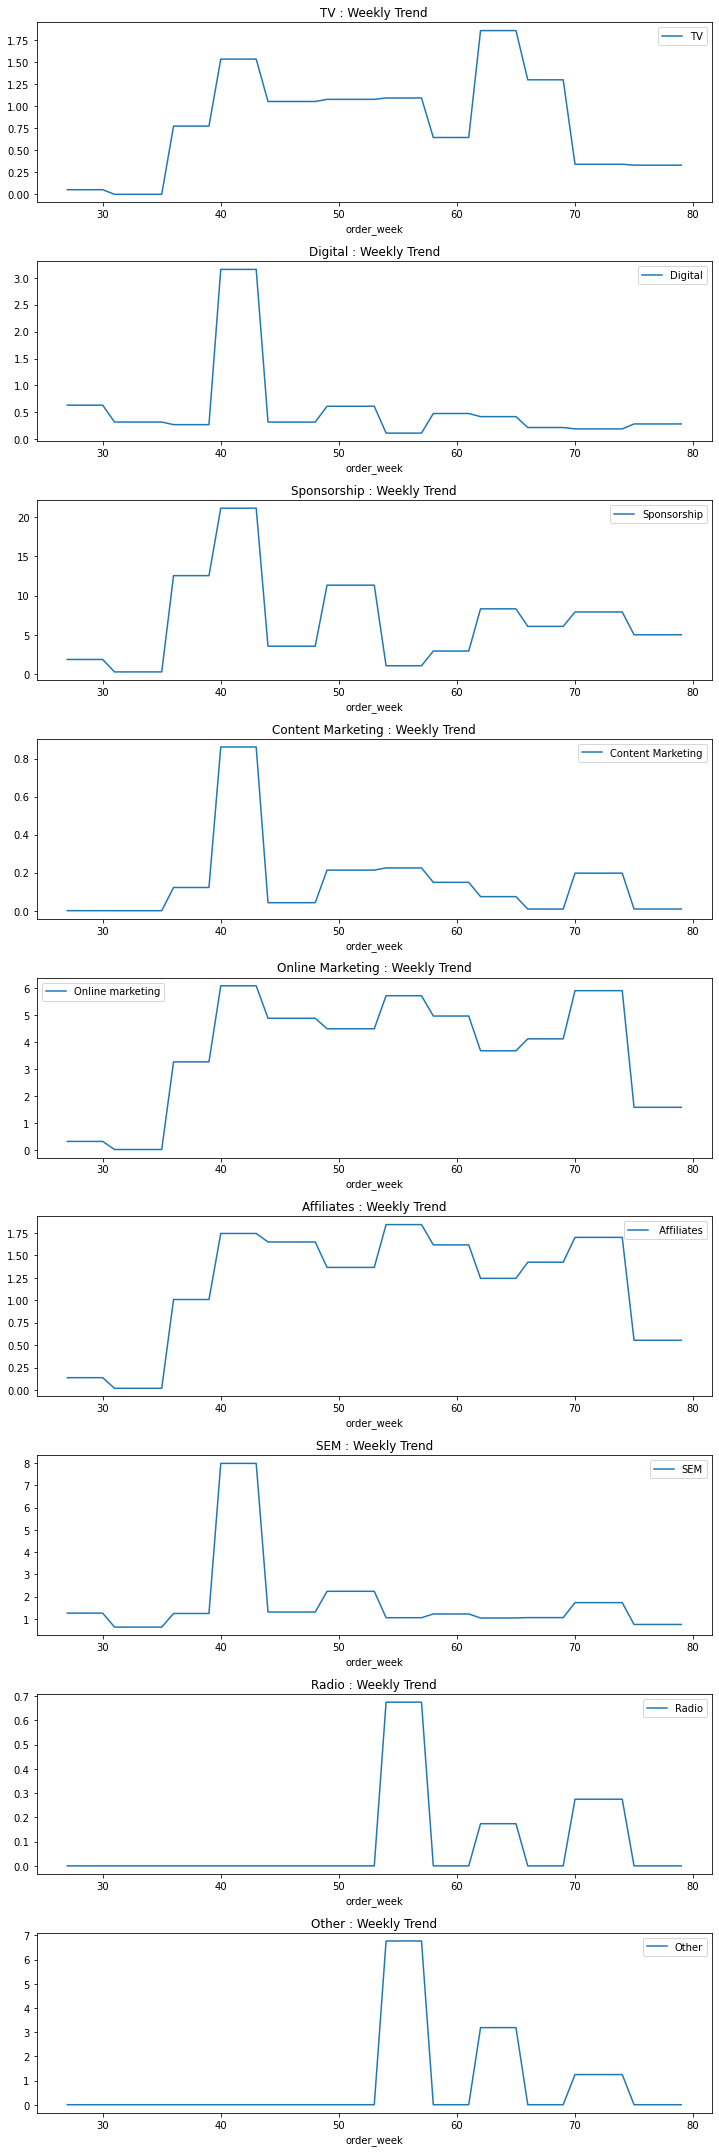

In [117]:
# Lets plot & analyze the Weekly Spends on each channel
fig = plt.figure(figsize=(10,30))

ax1 = fig.add_subplot(911)
ax1.set_title('TV : Weekly Trend')
ax2 = fig.add_subplot(912)
ax2.set_title('Digital : Weekly Trend')
ax3 = fig.add_subplot(913)
ax3.set_title('Sponsorship : Weekly Trend')
ax4 = fig.add_subplot(914)
ax4.set_title('Content Marketing : Weekly Trend')
ax5 = fig.add_subplot(915)
ax5.set_title('Online Marketing : Weekly Trend')
ax6 = fig.add_subplot(916)
ax6.set_title('Affiliates : Weekly Trend')
ax7 = fig.add_subplot(917)
ax7.set_title('SEM : Weekly Trend')
ax8 = fig.add_subplot(918)
ax8.set_title('Radio : Weekly Trend')
ax9 = fig.add_subplot(919)
ax9.set_title('Other : Weekly Trend')

media_investment_weekly.plot(x= 'order_week',y=['TV'],ax = ax1)
media_investment_weekly.plot(x= 'order_week',y=['Digital'],ax = ax2)
media_investment_weekly.plot(x= 'order_week',y=['Sponsorship'],ax = ax3)
media_investment_weekly.plot(x= 'order_week',y=['Content Marketing'],ax = ax4)
media_investment_weekly.plot(x= 'order_week',y=['Online marketing'],ax = ax5)
media_investment_weekly.plot(x= 'order_week',y=[' Affiliates'],ax = ax6)
media_investment_weekly.plot(x= 'order_week',y=['SEM'],ax = ax7)
media_investment_weekly.plot(x= 'order_week',y=['Radio'],ax = ax8)
media_investment_weekly.plot(x= 'order_week',y=['Other'],ax = ax9)

fig.tight_layout()
plt.show()

INSIGHTs:
- From the above trended plots, it can be inferred that between the weeks 39 to 45 for most of the channels, maximum amount of investments were done & that was done mainly through the Sponsorship media.

In [118]:
# Defingin the Adstock fucntion to create the adstocks data
def getAdStockData(media_investment_weekly,col_name, adstock_rate):
    media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_3_value'] = adstock_rate**3 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_4_value'] = adstock_rate**4 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_5_value'] = adstock_rate**5 * media_investment_weekly[col_name]
    for i in range(0, len(media_investment_weekly)):
        week1CarryOverValue  = media_investment_weekly.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_weekly.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_weekly.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_weekly.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_weekly.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_weekly.loc[i,"adStock_"+col_name] = media_investment_weekly.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_weekly[["order_week","adStock_"+col_name]]

In [119]:
# Computing adstocks for each of the investment channel
adStock_TV = getAdStockData(media_investment_weekly[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockData(media_investment_weekly[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockData(media_investment_weekly[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockData(media_investment_weekly[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockData(media_investment_weekly[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockData(media_investment_weekly[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockData(media_investment_weekly[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockData(media_investment_weekly[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockData(media_investment_weekly[['Other','order_week']],"Other", 0.5)

In [120]:
# Concatenating all the adstocks data to form the final dataset containing all the adstock data
adstock_final = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)

In [121]:
adstock_final.head()

,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,order_week,adStock_Other
0,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,27,0.0
1,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.0,28,0.0
2,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.0,29,0.0
3,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,0.0,30,0.0
4,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,0.0,31,0.0


In [122]:
# Merging the adstock data with the media investment data on order week
adstock_final_data = pd.merge(media_investment_weekly,adstock_final, on = "order_week", how = 'inner')

In [123]:
adstock_final_data

,order_week,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,...,Other,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,27,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,...,0.000000,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.000000,0.000000
1,28,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,...,0.000000,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.000000,0.000000
2,29,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,...,0.000000,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.000000,0.000000
3,30,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,...,0.000000,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,0.000000,0.000000
4,31,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,0.000000,0.000000
5,32,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.027648,0.776115,1.267609,0.000112,0.204007,0.091763,1.531288,0.000000,0.000000
6,33,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.014593,0.697681,0.870676,0.000054,0.129130,0.062165,1.374402,0.000000,0.000000
7,34,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.008065,0.658465,0.672209,0.000025,0.091691,0.047366,1.295959,0.000000,0.000000
8,35,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.004801,0.638856,0.572975,0.000010,0.072972,0.039966,1.256738,0.000000,0.000000
9,36,9,2015,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,...,0.000000,0.777460,0.580839,12.815056,0.122060,3.307299,1.025499,1.849175,0.000000,0.000000


In [124]:
adstock_final_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)

In [125]:
adstock_final_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.0,0.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.0,0.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,0.0,0.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,0.0,0.0


In [126]:
adstock_final_data.shape

(53, 12)

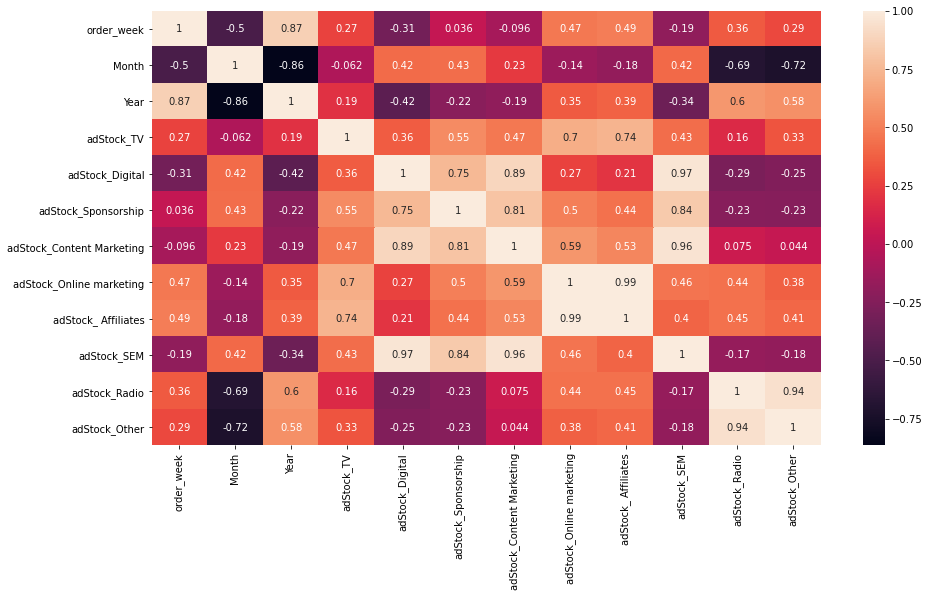

In [127]:
plt.figure(figsize = (15,8))
sns.heatmap(adstock_final_data.corr(), annot = True)
plt.show()

INSIGHTs:     
From the above Correlation Matrix, there is a high correlation between:
- adStock_Digital & adStock_SEM
- adStock_Content Marketing & adStock_SEM
- Month & adstock_radio, Month & adstock_others
- order_week & month, year & month, order_week & year
- adStock_Affiliates & adStock_Online marketing
- adStock_Other & adStock_Radio

In [128]:
# Mereging the adstock data with 3 prodyct sub categories
cameraAcc_final = pd.merge(adstock_final_data,cameraAcc_final, on = "order_week", how = 'right')
gamingAcc_final = pd.merge(adstock_final_data,gamingAcc_final, on = "order_week", how = 'right')
homeAudio_final = pd.merge(adstock_final_data,homeAudio_final, on = "order_week", how = 'right')

In [129]:
cameraAcc_final.shape

(52, 50)

In [130]:
gamingAcc_final.shape

(53, 43)

In [131]:
homeAudio_final.shape

(50, 38)

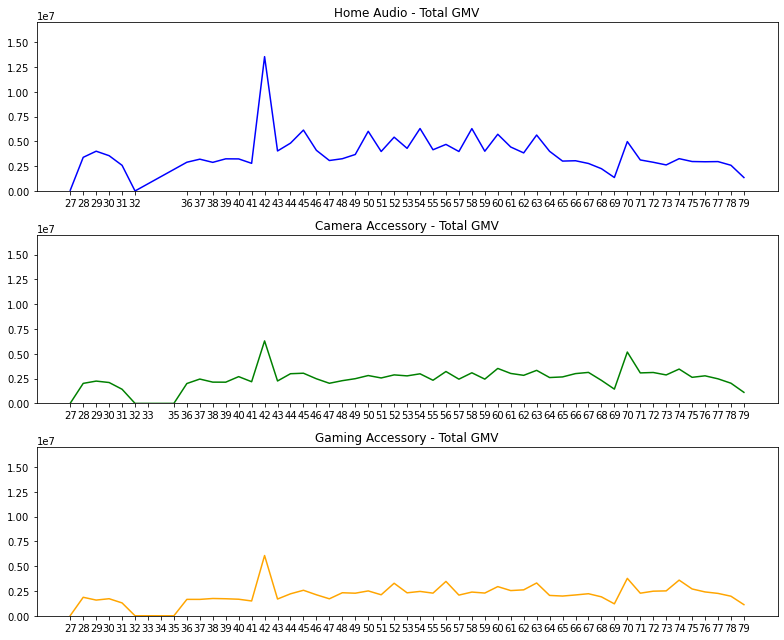

In [132]:
# Plotting the GMV trend by Week
fig, axes= plt.subplots(nrows=3,ncols=1,figsize=(11,9))

ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,17000000)
ax1 = plt.title('Home Audio - Total GMV')
ax1 = plt.plot(homeAudio_final['order_week'],homeAudio_final['gmv'],color='blue')
plt.xticks(homeAudio_final['order_week'])

ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,17000000)
ax2 = plt.title('Camera Accessory - Total GMV')
ax2 = plt.plot(cameraAcc_final['order_week'],cameraAcc_final['gmv'],color='g')
plt.xticks(cameraAcc_final['order_week'])

ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,17000000)
ax3 = plt.title('Gaming Accessory - Total GMV')
ax3 = plt.plot(gamingAcc_final['order_week'],gamingAcc_final['gmv'],color='orange')
plt.xticks(gamingAcc_final['order_week'])

fig.tight_layout()
plt.show()

INSIGHTs:
- From the above trended plot, the highest GMV was generated in the week-42 for all the three categories.
- The maximum GMV was generated for HomeAudio followed by Camera Accessory & then Gaming Accessory

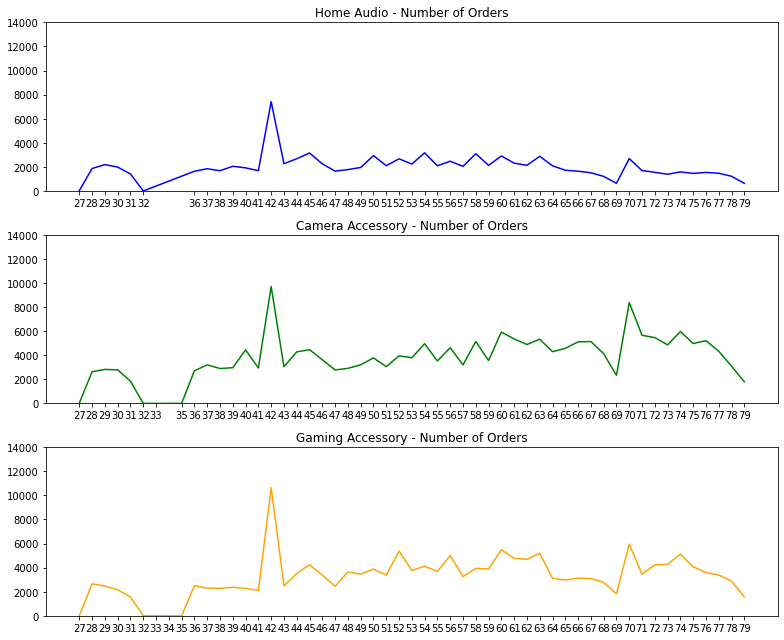

In [133]:
# Plotting the No of Orders trend by Week

fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(11,9))

ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,14000)
ax1 = plt.title('Home Audio - Number of Orders')
ax1 = plt.plot(homeAudio_final['order_week'],homeAudio_final['total_transactions'],color='blue')
plt.xticks(homeAudio_final['order_week'])

ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,14000)
ax2 = plt.title('Camera Accessory - Number of Orders')
ax2 = plt.plot(cameraAcc_final['order_week'],cameraAcc_final['total_transactions'],color='g')
plt.xticks(cameraAcc_final['order_week'])

ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,14000)
ax3 = plt.title('Gaming Accessory - Number of Orders')
ax3 = plt.plot(gamingAcc_final['order_week'],gamingAcc_final['total_transactions'],color='orange')
plt.xticks(gamingAcc_final['order_week'])

fig.tight_layout()
plt.show()

INSIGHTs:
- We could see the similar trend for no of orders as well, as the maximum number of orders were generated in week-42. And the highes was for Gaming Accessory.

In [134]:
# Lets try to find more insights around Holiday week sales & total GMV
Holiday_week_HA = homeAudio_final.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_CA = cameraAcc_final.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_GA = gamingAcc_final.groupby('is_holiday')[['gmv']].sum().reset_index()

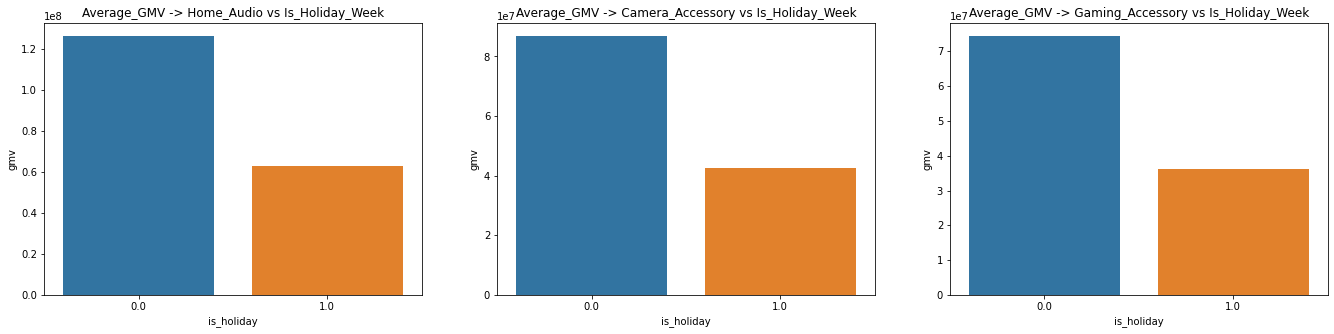

In [135]:
# Plotting & analysing the effect of Holiday week on total Sales(GMV)
plt.figure(figsize=(23,5))

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_HA)
ax1 = plt.title("Average_GMV -> Home_Audio vs Is_Holiday_Week")

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_CA)
ax2 = plt.title("Average_GMV -> Camera_Accessory vs Is_Holiday_Week")

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_GA)
ax3 = plt.title("Average_GMV -> Gaming_Accessory vs Is_Holiday_Week")

fig.tight_layout()
plt.show()

INSIGHTs:
- From the above graph, total sales(GMV) on weeks without holidays is higher.

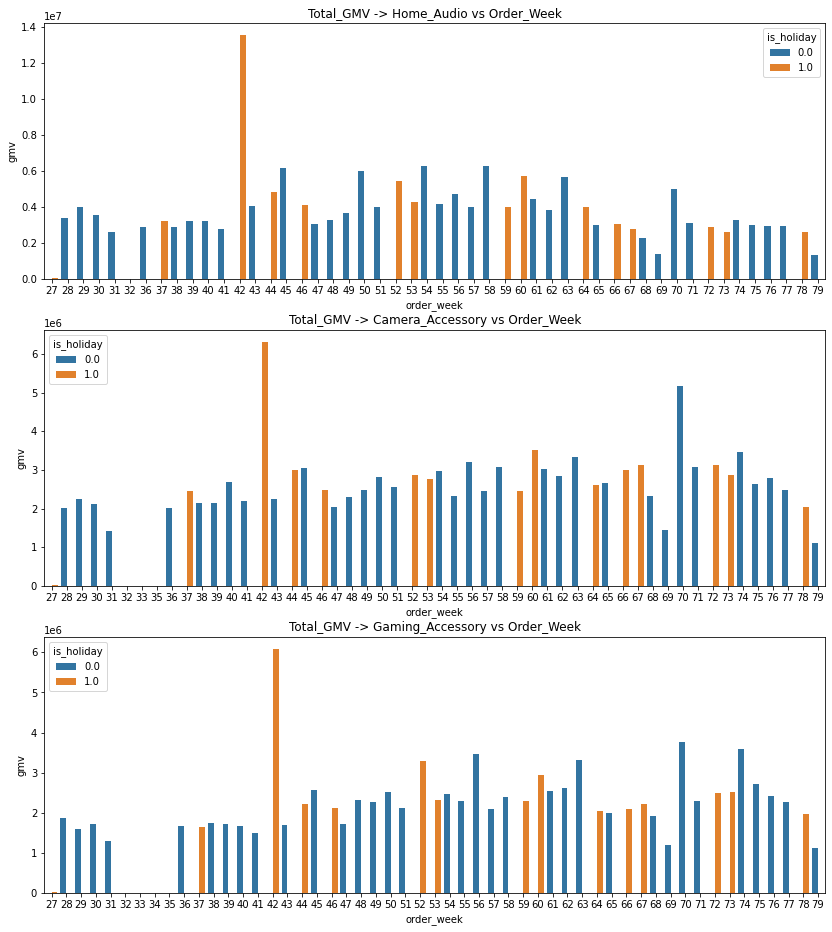

In [136]:
# Plotting & analyzing the total sales(GMV) over the weeks based on whether the week has a holiday or not.

plt.figure(figsize = (14,16))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = homeAudio_final, hue = 'is_holiday')
ax1 = plt.title("Total_GMV -> Home_Audio vs Order_Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = cameraAcc_final, hue = 'is_holiday')
ax1 = plt.title("Total_GMV -> Camera_Accessory vs Order_Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = gamingAcc_final, hue = 'is_holiday')
ax1 = plt.title("Total_GMV -> Gaming_Accessory vs Order_Week")

fig.tight_layout()
plt.show()

INSIGHTs:
- As we can see from the above plot that across the categories the highest sale was happened on week-24 which was a holiday week

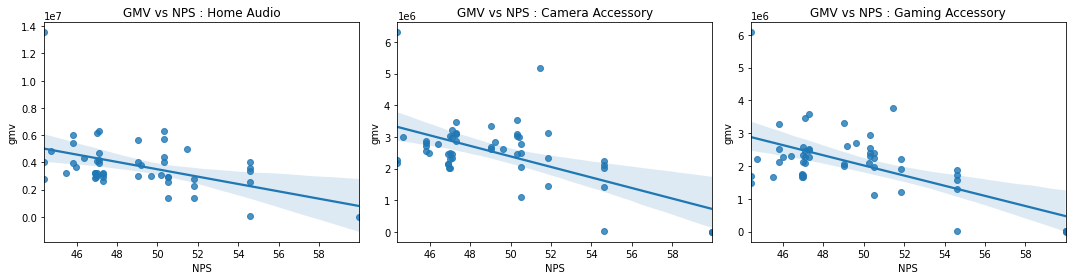

In [137]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(131)
ax1.set_title('GMV vs NPS : Home Audio')
ax2 = fig.add_subplot(132)
ax2.set_title('GMV vs NPS : Camera Accessory')
ax3 = fig.add_subplot(133)
ax3.set_title('GMV vs NPS : Gaming Accessory')

sns.regplot(homeAudio_final['NPS'],homeAudio_final['gmv'],ax = ax1)
sns.regplot(cameraAcc_final['NPS'],cameraAcc_final['gmv'],ax = ax2)
sns.regplot(gamingAcc_final['NPS'],gamingAcc_final['gmv'],ax = ax3)

fig.tight_layout()
plt.show()

INSIGHTs:
- From the above regplot, we can see a slightly negative correlation between the NPS & total sales(GMV) across all the categories

#### Importing the Climate Data

In [138]:
# Importing climate data for year 2015
climate_2015 = pd.read_excel('ONTARIO-2015.xlsx', skiprows=24)
climate_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,...,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,...,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [139]:
# Importing climate data for year 2016
climate_2016 = pd.read_excel('ONTARIO-2016.xlsx', skiprows=24)
climate_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Deleting the columns full of null values

climate_2015.dropna(axis=1, thresh=1, inplace=True)
climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(axis=1, thresh=1, inplace=True)
climate_2016.reset_index(drop=True, inplace=True)

In [141]:
# Deleting the columns with only one unique value for 2015 climate data

drop_cols = []
for col in climate_2015.columns:
    if 'Flag' in col:
        drop_cols.append(col)

drop_cols.append('Data Quality')
climate_2015.drop(drop_cols, axis=1, inplace=True)

In [142]:
# Deleting the columns with only one unique value for 2016 climate data

drop_cols = []
for col in climate_2016.columns:
    if 'Flag' in col:
        drop_cols.append(col)

drop_cols.append('Data Quality')
climate_2016.drop(drop_cols, axis=1, inplace=True)

In [143]:
# Renaming the columns for convenience
climate_2015.columns = [col.replace(' (°C)','').strip() for col in climate_2015.columns]
climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]

In [144]:
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [145]:
climate_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [146]:
# Now lets delete those rows where all the values are null
cols = ['Mean Temp','Total Rain (mm)']

climate_2015.dropna(subset=cols, inplace=True)
climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(subset=cols, inplace=True)
climate_2016.reset_index(drop=True, inplace=True)

In [147]:
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0


In [148]:
climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0


In [149]:
climate_2015['Date/Time'] = climate_2015['Date/Time'].astype('str')
climate_2016['Date/Time'] = climate_2016['Date/Time'].astype('str')

In [150]:
# Deriving the week number from the date column for 2015
import datetime
climate_2015['order_week'] = climate_2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))
climate_2015['order_week'] = climate_2015['order_week'].apply(lambda x: str(x).lstrip('0'))
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0,1
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,1
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0,1
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0,1
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0,2


In [151]:
# Deriving the week number from the date column for 2016
climate_2016['order_week'] = climate_2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))
climate_2016['order_week'] = climate_2016['order_week'].apply(lambda x: str(x).lstrip('0'))
climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,1
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,1
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,1
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,2
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,2


In [152]:
climate_2015['order_week'] = climate_2015['order_week'].astype(int)
climate_2016['order_week'] = climate_2016['order_week'].astype(int)

In [153]:
# Deriving order_week as per the year calendar
climate_2015['order_week'] = climate_2015.apply(lambda x: ordWeek(x['order_week'],x['Year']), axis = 1)
climate_2016['order_week'] = climate_2016.apply(lambda x: ordWeek(x['order_week'],x['Year']), axis = 1)

In [154]:
# Pulling July to Dec data from 2015
climate_2015 = climate_2015[climate_2015['Month'] >= 7]
climate_2015.reset_index(drop=True, inplace=True)
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,27
1,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,27
2,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,27
3,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,27
4,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,27


In [155]:
# Pulling Jan to June data from 2016

climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)
climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,54
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,54
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,54
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,55
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,55


In [156]:
climate_2015.sort_values(by=['order_week'], ascending = True, inplace = True)
climate_2016.sort_values(by=['order_week'], ascending = True, inplace = True)

In [157]:
# Aggregating to get weekly data -2015
climate_2015 = climate_2015.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)
climate_2015.head()

,order_week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,28.0,10.0,19.360000,0.100000,1.460000,0.000000,0.0,0.000000,0.0
1,28,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
2,29,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
3,30,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0
4,31,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0


In [158]:
# Aggregating to get weekly data -2016
climate_2016 = climate_2016.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)
climate_2016.head()

,order_week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,54,11.0,-14.0,0.066667,17.933333,0.0,7.866667,2.333333,10.200000,0.000000
1,55,4.5,-12.0,-3.733333,21.733333,0.0,2.533333,0.000000,2.533333,10.333333
2,57,5.5,-9.0,-1.800000,19.800000,0.0,0.000000,0.000000,0.000000,0.000000
3,58,13.0,-5.5,3.200000,14.800000,0.0,3.400000,0.000000,3.400000,0.000000
4,59,5.0,-18.0,-7.266667,25.266667,0.0,0.000000,2.666667,2.666667,2.000000


In [159]:
# Concatination 2015 & 12016 to get final climate data
climate = pd.concat([climate_2015, climate_2016], axis = 0)
climate.shape

(52, 10)

In [160]:
# Dropping the columns which are not relevant
climate=climate.drop(['Max Temp','Min Temp','Heat Deg Days','Cool Deg Days','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)'],axis=1)
climate.head()

,order_week,Mean Temp,Total Rain (mm)
0,27,19.360000,0.000000
1,28,20.100000,4.416667
2,29,23.183333,1.400000
3,30,23.060000,1.080000
4,31,24.566667,4.633333


#### Merging the climate data to get the FINAL dataset  for Modelling for each of the product category

In [161]:
cameraAcc_final_climate = pd.merge(cameraAcc_final,climate, on = "order_week", how = 'inner')
gamingAcc_final_climate = pd.merge(gamingAcc_final,climate, on = "order_week", how = 'inner')
homeAudio_final_climate = pd.merge(homeAudio_final,climate, on = "order_week", how = 'inner')

However, We will not be considering the climate data for our modelling purpose as this is an external factor which is not in company's control.

## 5. Model Building & Evaluation

### Basic Additive Linear Model

In [162]:
# calculate the elasticity of the important KPIs
def getElasticity(train, gmv, coefficient):
    elasticity = []
    for i in coefficient.feature:
        feature_mean = train[i].mean()
        elasticity.append((((coefficient.loc[coefficient['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient['elasticity'] = pd.Series(elasticity)
    return coefficient

#### 1. Camera Accessory - Basic Additive Linear Model

In [163]:
cameraAcc_final.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,13.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,433.0,0.0,226.0,17.0,0.0,366.0,0.0,0.0,13.0,16.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,491.0,0.0,188.0,23.0,0.0,382.0,0.0,0.0,24.0,22.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,457.0,0.0,194.0,18.0,0.0,423.0,0.0,0.0,23.0,30.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,363.0,0.0,112.0,26.0,0.0,233.0,0.0,0.0,23.0,13.0


In [164]:
# dropping the columns which are under no control of the company
cameraAcc_model = cameraAcc_final.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [165]:
cameraAcc_model.shape

(52, 46)

In [166]:
# splitting dataset into train & test
df_train, df_test = train_test_split(cameraAcc_model, train_size = 0.8, test_size = 0.2, random_state = 100)

In [167]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [168]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [169]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [170]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['adStock_TV', 'adStock_Digital', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'product_procurement_sla', 'NPS', 'Binoculars', 'CameraBattery',
       'CameraBatteryCharger', 'CameraFilmRolls', 'CameraMicrophone', 'Filter',
       'Flash', 'ReflectorUmbrella', 'Strap', 'Telescope'],
      dtype='object')

In [171]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [172]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.29e-19
Time:                        17:00:19   Log-Likelihood:                -516.29
No. Observations:                  41   AIC:                             1075.
Df Residuals:                      20   BIC:                             1111.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,5004.65
2,adStock_Digital,3555.79
3,adStock_Online marketing,2679.83
4,adStock_ Affiliates,2408.77
6,adStock_Radio,1566.53
7,adStock_Other,1500.77
0,const,549.55
1,adStock_TV,234.17
13,CameraBatteryCharger,23.97
15,CameraMicrophone,21.33


In [173]:
#removing the feature with higher p-value
X_train_v2= X_train_rfe.drop(["CameraBatteryCharger"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           7.05e-20
Time:                        17:00:19   Log-Likelihood:                -516.80
No. Observations:                  41   AIC:                             1074.
Df Residuals:                      21   BIC:                             1108.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,4578.06
2,adStock_Digital,3268.93
3,adStock_Online marketing,2436.39
4,adStock_ Affiliates,2249.87
6,adStock_Radio,1564.57
7,adStock_Other,1496.67
0,const,546.16
1,adStock_TV,226.77
10,NPS,14.23
19,Telescope,12.20


In [174]:
#removing the feature with higher p-value
X_train_v3= X_train_v2.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     221.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.76e-21
Time:                        17:00:19   Log-Likelihood:                -518.27
No. Observations:                  41   AIC:                             1075.
Df Residuals:                      22   BIC:                             1107.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,3367.34
2,adStock_Digital,2381.04
3,adStock_Online marketing,2293.59
4,adStock_ Affiliates,2073.27
6,adStock_Radio,1198.73
7,adStock_Other,1146.46
0,const,523.80
1,adStock_TV,187.18
18,Telescope,11.68
11,CameraBattery,10.02


In [175]:
#removing the feature with higher p-value
X_train_v4= X_train_v3.drop(["CameraMicrophone"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.17e-21
Time:                        17:00:19   Log-Likelihood:                -520.55
No. Observations:                  41   AIC:                             1077.
Df Residuals:                      23   BIC:                             1108.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,2767.76
2,adStock_Digital,1999.06
3,adStock_Online marketing,1681.75
4,adStock_ Affiliates,1512.07
6,adStock_Radio,1164.16
7,adStock_Other,1107.41
0,const,504.77
1,adStock_TV,155.35
17,Telescope,11.00
11,CameraBattery,9.55


In [176]:
#removing the feature with higher p-value
X_train_v5= X_train_v4.drop(["Telescope"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.46e-22
Time:                        17:00:19   Log-Likelihood:                -522.94
No. Observations:                  41   AIC:                             1080.
Df Residuals:                      24   BIC:                             1109.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,2767.55
2,adStock_Digital,1998.00
3,adStock_Online marketing,1561.81
4,adStock_ Affiliates,1392.08
6,adStock_Radio,1161.77
7,adStock_Other,1104.48
0,const,504.58
1,adStock_TV,155.31
11,CameraBattery,8.37
10,Binoculars,7.98


In [177]:
# Removing the feature with higher VIF values
X_train_v6= X_train_v5.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     66.24
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.45e-16
Time:                        17:00:19   Log-Likelihood:                -548.99
No. Observations:                  41   AIC:                             1130.
Df Residuals:                      25   BIC:                             1157.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,414.53
4,adStock_ Affiliates,332.89
5,adStock_Radio,243.85
6,adStock_Other,216.18
0,const,97.22
1,adStock_TV,26.13
9,Binoculars,7.98
15,Strap,7.48
13,Flash,7.19
10,CameraBattery,6.66


In [178]:
# Removing the feature with higher p-value
X_train_v7= X_train_v6.drop(["CameraFilmRolls"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     73.78
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.79e-17
Time:                        17:00:19   Log-Likelihood:                -549.00
No. Observations:                  41   AIC:                             1128.
Df Residuals:                      26   BIC:                             1154.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,358.81
4,adStock_ Affiliates,291.69
5,adStock_Radio,242.61
6,adStock_Other,215.77
0,const,87.12
1,adStock_TV,26.03
9,Binoculars,7.97
12,Flash,6.85
14,Strap,6.50
10,CameraBattery,6.36


In [179]:
# Removing the feature with higher p-value
X_train_v8= X_train_v7.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     82.29
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.08e-18
Time:                        17:00:19   Log-Likelihood:                -549.06
No. Observations:                  41   AIC:                             1126.
Df Residuals:                      27   BIC:                             1150.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_ Affiliates,202.75
3,adStock_Online marketing,177.32
0,const,81.98
11,Flash,6.78
1,adStock_TV,6.64
13,Strap,6.11
8,Binoculars,5.27
10,Filter,4.94
9,CameraBattery,4.54
2,adStock_Digital,4.40


In [180]:
# Removing the feature with higher p-value
X_train_v9= X_train_v8.drop(["ReflectorUmbrella"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     92.30
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.18e-19
Time:                        17:00:19   Log-Likelihood:                -549.09
No. Observations:                  41   AIC:                             1124.
Df Residuals:                      28   BIC:                             1146.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_ Affiliates,196.49
3,adStock_Online marketing,174.64
0,const,81.58
11,Flash,6.57
12,Strap,6.11
1,adStock_TV,5.40
8,Binoculars,5.21
10,Filter,4.84
9,CameraBattery,4.48
2,adStock_Digital,4.33


In [181]:
# Removing the feature with higher p-value
X_train_v10= X_train_v9.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.54e-20
Time:                        17:00:19   Log-Likelihood:                -549.67
No. Observations:                  41   AIC:                             1123.
Df Residuals:                      29   BIC:                             1144.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_ Affiliates,196.44
3,adStock_Online marketing,173.52
0,const,81.56
10,Flash,6.08
11,Strap,6.01
1,adStock_TV,5.35
7,Binoculars,4.86
9,Filter,4.77
8,CameraBattery,4.48
2,adStock_Digital,4.20


In [182]:
# Removing the feature with higher p-value
X_train_v11= X_train_v10.drop(["sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     110.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           7.32e-21
Time:                        17:00:19   Log-Likelihood:                -550.48
No. Observations:                  41   AIC:                             1123.
Df Residuals:                      30   BIC:                             1142.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_ Affiliates,190.80
3,adStock_Online marketing,170.29
0,const,26.55
9,Flash,5.71
10,Strap,5.65
1,adStock_TV,5.07
6,Binoculars,4.84
8,Filter,4.67
2,adStock_Digital,4.18
7,CameraBattery,4.15


In [183]:
# Removing the feature with higher p-value
X_train_v12= X_train_v11.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.28e-21
Time:                        17:00:19   Log-Likelihood:                -551.42
No. Observations:                  41   AIC:                             1123.
Df Residuals:                      31   BIC:                             1140.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,95.48
3,adStock_ Affiliates,88.35
0,const,26.33
8,Flash,5.69
9,Strap,5.40
5,Binoculars,4.81
7,Filter,4.63
6,CameraBattery,3.78
1,adStock_Digital,2.68
4,product_procurement_sla,2.04


In [184]:
# Removing the feature with higher p-value
X_train_v13= X_train_v12.drop(["product_procurement_sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.71e-22
Time:                        17:00:19   Log-Likelihood:                -552.07
No. Observations:                  41   AIC:                             1122.
Df Residuals:                      32   BIC:                             1138.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,95.28
3,adStock_ Affiliates,87.71
0,const,12.32
8,Strap,5.18
7,Flash,4.96
4,Binoculars,4.81
6,Filter,4.40
5,CameraBattery,3.63
1,adStock_Digital,2.65


In [185]:
# Removing the feature with higher p-value
X_train_v14= X_train_v13.drop(["Flash"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.13e-23
Time:                        17:00:20   Log-Likelihood:                -552.70
No. Observations:                  41   AIC:                             1121.
Df Residuals:                      33   BIC:                             1135.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,92.97
3,adStock_ Affiliates,86.10
0,const,10.78
4,Binoculars,4.43
6,Filter,4.36
5,CameraBattery,3.39
7,Strap,2.68
1,adStock_Digital,2.23


In [186]:
# Removing the feature with higher p-value
X_train_v15= X_train_v14.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.09e-24
Time:                        17:00:20   Log-Likelihood:                -554.19
No. Observations:                  41   AIC:                             1122.
Df Residuals:                      34   BIC:                             1134.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.30
3,Binoculars,4.42
5,Filter,4.32
4,CameraBattery,3.34
6,Strap,2.65
2,adStock_Online marketing,1.83
1,adStock_Digital,1.79


In [187]:
# Removing the feature with higher p-value
X_train_v16 = X_train_v15.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.16e-24
Time:                        17:00:20   Log-Likelihood:                -555.67
No. Observations:                  41   AIC:                             1123.
Df Residuals:                      35   BIC:                             1134.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.14
4,Filter,4.22
2,Binoculars,4.16
3,CameraBattery,3.34
5,Strap,2.07
1,adStock_Online marketing,1.68


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL base model.

### Model Evaluation (Basic Additive Linear Model)
#### Camera Accessory

In [188]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumn_products', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'Binoculars', 'CameraAccessory',
       'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [189]:
X_train_lm.columns

Index(['const', 'adStock_Online marketing', 'Binoculars', 'CameraBattery',
       'Filter', 'Strap'],
      dtype='object')

In [190]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,adStock_Online marketing,Binoculars,CameraBattery,Filter,Strap
6,1.0,0.004817,0.000000,0.000000,0.000000,0.000000
32,1.0,0.847652,0.323691,1.073034,0.236345,0.452055
38,1.0,0.657735,0.341598,0.800562,0.245798,0.424658
35,1.0,0.668144,0.336088,0.804073,0.341387,0.575342
33,1.0,0.839590,0.363636,0.585674,0.221639,0.575342
51,1.0,0.274537,0.154270,0.177669,0.114496,0.273973
5,1.0,0.011240,0.000000,0.000000,0.000000,0.000000
26,1.0,0.858789,0.316804,0.390449,0.237395,0.356164
25,1.0,0.754824,0.318182,0.450140,0.267857,0.383562
45,1.0,0.977836,0.369146,0.532303,0.218487,0.589041


In [191]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [192]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9608340963193691

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

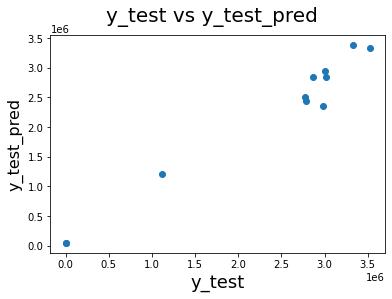

In [193]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [194]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

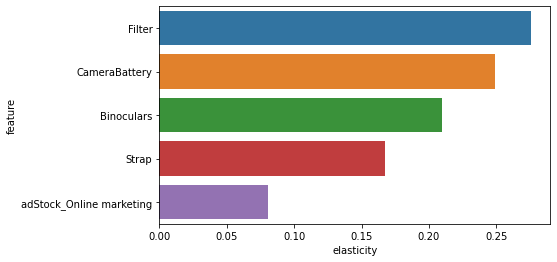

In [195]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### 2. Gaming Accessory - Basic Additive Linear Model

In [196]:
gamingAcc_final.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,GamingChargingStation,GamingHeadset,GamingKeyboard,GamingMemoryCard,GamingMouse,GamingMousePad,GamingSpeaker,JoystickGamingWheel,MotionController,TVOutCableAccessory
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,0.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,0.0,177.0,424.0,36.0,966.0,55.0,0.0,11.0,16.0,73.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,0.0,179.0,162.0,27.0,357.0,48.0,0.0,8.0,11.0,92.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,0.0,283.0,170.0,28.0,448.0,67.0,0.0,9.0,11.0,93.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,0.0,424.0,71.0,11.0,232.0,39.0,1.0,17.0,8.0,79.0


In [197]:
gamingAcc_final.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'units', 'sla',
       'product_procurement_sla', 'product_mrp', 'selling_price', 'NPS',
       'discount', 'total_transactions', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [198]:
# dropping the columns which are under no control of the company
gamingAcc_model = gamingAcc_final.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [199]:
gamingAcc_model.shape

(53, 39)

In [200]:
# splitting dataset into train & test
df_train, df_test = train_test_split(gamingAcc_model, train_size = 0.8, test_size = 0.2, random_state = 100)

In [201]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [202]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other','sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [203]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [204]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'NPS', 'total_holidays', 'is_holiday',
       'GamePad', 'GamingAccessoryKit', 'GamingHeadset', 'GamingMemoryCard',
       'GamingMouse', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController'],
      dtype='object')

In [205]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [206]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.96e-19
Time:                        17:00:20   Log-Likelihood:                -532.14
No. Observations:                  42   AIC:                             1106.
Df Residuals:                      21   BIC:                             1143.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,9.226689e+08
7,adStock_SEM,8.597790e+03
3,adStock_Digital,5.400460e+03
8,adStock_Radio,4.396730e+03
9,adStock_Other,4.294240e+03
5,adStock_Content Marketing,6.574300e+02
2,adStock_TV,5.966300e+02
6,adStock_ Affiliates,1.710700e+02
4,adStock_Sponsorship,9.790000e+01
1,Year,5.674000e+01


In [207]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.23e-20
Time:                        17:00:21   Log-Likelihood:                -532.93
No. Observations:                  42   AIC:                             1106.
Df Residuals:                      22   BIC:                             1141.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.713e+09   5

,Features,VIF
0,const,8.969124e+08
6,adStock_SEM,6.615980e+03
3,adStock_Digital,4.990450e+03
7,adStock_Radio,3.422580e+03
8,adStock_Other,3.003500e+03
2,adStock_TV,3.223600e+02
5,adStock_ Affiliates,6.507000e+01
1,Year,5.516000e+01
4,adStock_Sponsorship,4.279000e+01
18,JoystickGamingWheel,2.502000e+01


In [208]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.12e-21
Time:                        17:00:21   Log-Likelihood:                -534.44
No. Observations:                  42   AIC:                             1107.
Df Residuals:                      23   BIC:                             1140.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.729e+09   5

,Features,VIF
0,const,8.963694e+08
6,adStock_SEM,6.034430e+03
3,adStock_Digital,4.514510e+03
7,adStock_Radio,2.819350e+03
8,adStock_Other,2.420950e+03
2,adStock_TV,2.597600e+02
1,Year,5.513000e+01
4,adStock_Sponsorship,4.203000e+01
5,adStock_ Affiliates,3.443000e+01
17,JoystickGamingWheel,2.390000e+01


In [209]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.22e-21
Time:                        17:00:21   Log-Likelihood:                -535.87
No. Observations:                  42   AIC:                             1108.
Df Residuals:                      24   BIC:                             1139.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.72e+09   5

,Features,VIF
0,const,8.961879e+08
5,adStock_SEM,6.034430e+03
3,adStock_Digital,4.514460e+03
6,adStock_Radio,2.656850e+03
7,adStock_Other,2.268390e+03
2,adStock_TV,2.240700e+02
1,Year,5.511000e+01
4,adStock_Sponsorship,4.154000e+01
16,JoystickGamingWheel,2.334000e+01
8,total_holidays,2.170000e+01


In [210]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["GamingAccessoryKit"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.46e-22
Time:                        17:00:21   Log-Likelihood:                -538.32
No. Observations:                  42   AIC:                             1111.
Df Residuals:                      25   BIC:                             1140.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.226e+09   4

,Features,VIF
0,const,6.043348e+08
5,adStock_SEM,5.494250e+03
3,adStock_Digital,4.089220e+03
6,adStock_Radio,2.444550e+03
7,adStock_Other,2.088550e+03
2,adStock_TV,1.779600e+02
4,adStock_Sponsorship,4.153000e+01
1,Year,3.717000e+01
8,total_holidays,1.943000e+01
9,is_holiday,1.910000e+01


In [211]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["GamingSpeaker"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     187.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.41e-22
Time:                        17:00:21   Log-Likelihood:                -541.27
No. Observations:                  42   AIC:                             1115.
Df Residuals:                      26   BIC:                             1142.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.072e+09   4

,Features,VIF
0,const,5.845904e+08
5,adStock_SEM,5.220050e+03
3,adStock_Digital,3.885890e+03
6,adStock_Radio,2.343510e+03
7,adStock_Other,2.001680e+03
2,adStock_TV,1.700000e+02
4,adStock_Sponsorship,3.932000e+01
1,Year,3.596000e+01
8,total_holidays,1.771000e+01
9,is_holiday,1.769000e+01


In [212]:
# Removing the feature with higher VIF value
X_train_v7 = X_train_v6.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.28e-20
Time:                        17:00:21   Log-Likelihood:                -552.54
No. Observations:                  42   AIC:                             1135.
Df Residuals:                      27   BIC:                             1161.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.888e+08   2

,Features,VIF
0,const,1.487994e+08
6,adStock_Other,4.282000e+01
5,adStock_Radio,3.807000e+01
8,is_holiday,1.487000e+01
7,total_holidays,1.482000e+01
1,Year,9.140000e+00
4,adStock_Sponsorship,8.590000e+00
13,JoystickGamingWheel,6.750000e+00
2,adStock_TV,6.510000e+00
3,adStock_Digital,4.920000e+00


In [213]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.16e-21
Time:                        17:00:21   Log-Likelihood:                -552.67
No. Observations:                  42   AIC:                             1133.
Df Residuals:                      28   BIC:                             1158.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.879e+08   2

,Features,VIF
0,const,1.487905e+08
5,adStock_Other,4.274000e+01
4,adStock_Radio,3.750000e+01
7,is_holiday,1.477000e+01
6,total_holidays,1.474000e+01
1,Year,9.140000e+00
2,adStock_TV,6.290000e+00
12,JoystickGamingWheel,5.920000e+00
3,adStock_Sponsorship,4.620000e+00
9,GamingHeadset,4.280000e+00


In [214]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.07e-22
Time:                        17:00:21   Log-Likelihood:                -552.89
No. Observations:                  42   AIC:                             1132.
Df Residuals:                      29   BIC:                             1154.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.614e+08   2

,Features,VIF
0,const,1.446446e+08
6,is_holiday,1.391000e+01
5,total_holidays,1.385000e+01
1,Year,8.890000e+00
2,adStock_TV,5.260000e+00
3,adStock_Sponsorship,4.470000e+00
4,adStock_Other,4.150000e+00
8,GamingHeadset,4.140000e+00
11,JoystickGamingWheel,4.080000e+00
10,GamingMouse,2.960000e+00


In [215]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     162.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.32e-23
Time:                        17:00:21   Log-Likelihood:                -553.60
No. Observations:                  42   AIC:                             1131.
Df Residuals:                      30   BIC:                             1152.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.024e+08   2

,Features,VIF
0,const,98315399.62
5,is_holiday,13.76
4,total_holidays,13.53
1,Year,6.04
2,adStock_TV,5.23
3,adStock_Sponsorship,4.47
10,JoystickGamingWheel,3.75
7,GamingHeadset,3.66
9,GamingMouse,2.77
6,GamePad,2.72


In [216]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.38e-24
Time:                        17:00:21   Log-Likelihood:                -554.12
No. Observations:                  42   AIC:                             1130.
Df Residuals:                      31   BIC:                             1149.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.898e+04   7

,Features,VIF
4,is_holiday,12.69
3,total_holidays,12.65
0,const,10.28
6,GamingHeadset,2.84
5,GamePad,2.54
8,GamingMouse,2.48
1,adStock_TV,2.33
10,MotionController,2.25
2,adStock_Sponsorship,2.02
9,JoystickGamingWheel,1.67


In [217]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["total_holidays"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.28e-25
Time:                        17:00:21   Log-Likelihood:                -554.55
No. Observations:                  42   AIC:                             1129.
Df Residuals:                      32   BIC:                             1146.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.447e+04   7

,Features,VIF
0,const,10.19
5,GamingHeadset,2.84
4,GamePad,2.54
7,GamingMouse,2.48
1,adStock_TV,2.31
9,MotionController,2.23
2,adStock_Sponsorship,2.02
8,JoystickGamingWheel,1.61
6,GamingMemoryCard,1.49
3,is_holiday,1.10


In [218]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["is_holiday"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.28e-27
Time:                        17:00:21   Log-Likelihood:                -554.73
No. Observations:                  42   AIC:                             1127.
Df Residuals:                      33   BIC:                             1143.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.535e+04   7

,Features,VIF
0,const,9.63
4,GamingHeadset,2.80
3,GamePad,2.52
6,GamingMouse,2.44
1,adStock_TV,2.31
8,MotionController,2.22
2,adStock_Sponsorship,2.02
7,JoystickGamingWheel,1.61
5,GamingMemoryCard,1.46


In [219]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     264.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.02e-27
Time:                        17:00:21   Log-Likelihood:                -555.53
No. Observations:                  42   AIC:                             1127.
Df Residuals:                      34   BIC:                             1141.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.143e+04   7

,Features,VIF
0,const,9.61
2,GamePad,2.51
3,GamingHeadset,2.49
7,MotionController,2.21
5,GamingMouse,2.17
6,JoystickGamingWheel,1.53
1,adStock_TV,1.51
4,GamingMemoryCard,1.43


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL base model.

### Model Evaluation (Basic Additive Linear Model)
#### Gaming Accessory

In [220]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumn_products', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'CoolingPad', 'GameControlMount',
       'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [221]:
X_train_lm.columns

Index(['const', 'adStock_TV', 'GamePad', 'GamingHeadset', 'GamingMemoryCard',
       'GamingMouse', 'JoystickGamingWheel', 'MotionController'],
      dtype='object')

In [222]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,adStock_TV,GamePad,GamingHeadset,GamingMemoryCard,GamingMouse,JoystickGamingWheel,MotionController
25,1.0,0.597798,0.612525,0.637781,1.332604,0.239264,0.144444,0.636364
48,1.0,0.186137,0.567210,0.381409,0.144420,0.202454,0.922222,0.272727
52,1.0,0.183502,0.208248,0.164618,0.017505,0.062294,0.477778,0.500000
37,1.0,0.957191,0.500000,0.269265,0.094092,0.129778,0.177778,0.409091
6,1.0,0.002763,0.001018,0.000300,0.000000,0.000000,0.000000,0.000000
18,1.0,0.648552,0.596232,0.309445,0.091904,0.391694,0.100000,0.136364
20,1.0,0.597644,0.368126,0.243478,0.192560,0.092732,0.077778,0.272727
46,1.0,0.214315,0.469450,0.596702,0.129103,0.145352,0.633333,0.772727
5,1.0,0.006448,0.000509,0.000300,0.000000,0.000000,0.000000,0.000000
31,1.0,0.480341,0.440428,0.479460,0.573304,0.169655,0.077778,0.318182


In [223]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [224]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9825164448753577

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

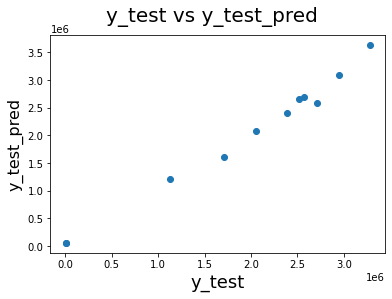

In [225]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [226]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

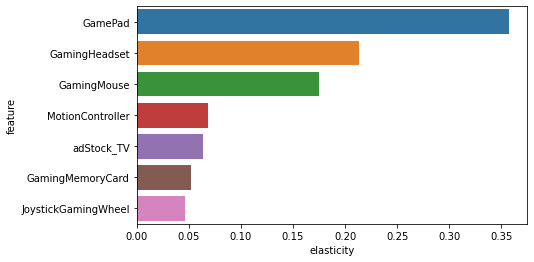

In [227]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### 3. Home Audio - Basic Additive Linear Model

In [228]:
homeAudio_final.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,4.0,0.0,0.0,0.0,2.0,0.0,26.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,60.0,0.0,30.0,1.0,478.0,13.0,1281.0,0.0,0.0,25.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,57.0,0.0,50.0,1.0,532.0,27.0,1511.0,0.0,0.0,26.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,65.0,0.0,56.0,0.0,509.0,20.0,1332.0,0.0,0.0,22.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,37.0,0.0,44.0,0.0,372.0,11.0,939.0,0.0,0.0,16.0


In [229]:
homeAudio_final.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'units', 'sla',
       'product_procurement_sla', 'product_mrp', 'selling_price', 'NPS',
       'discount', 'total_transactions', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [230]:
# dropping the columns which are under no control of the company
homeAudio_model = homeAudio_final.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [231]:
homeAudio_model.shape

(50, 34)

In [232]:
# splitting dataset into train & test
df_train, df_test = train_test_split(homeAudio_model, train_size = 0.8, test_size = 0.2, random_state = 100)

In [233]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [234]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [235]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [236]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'product_procurement_sla', 'NPS', 'discount', 'BoomBox', 'DJController',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [237]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [238]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.54e-25
Time:                        17:00:22   Log-Likelihood:                -493.14
No. Observations:                  40   AIC:                             1028.
Df Residuals:                      19   BIC:                             1064.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,5.152366e+08
8,adStock_SEM,6.435800e+03
3,adStock_Digital,4.596150e+03
10,adStock_Other,3.343800e+03
9,adStock_Radio,3.330620e+03
7,adStock_ Affiliates,3.048150e+03
6,adStock_Online marketing,2.554740e+03
5,adStock_Content Marketing,5.735500e+02
2,adStock_TV,4.600800e+02
4,adStock_Sponsorship,3.147700e+02


In [239]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1294.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.04e-27
Time:                        17:00:22   Log-Likelihood:                -493.46
No. Observations:                  40   AIC:                             1027.
Df Residuals:                      20   BIC:                             1061.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,4.639621e+08
7,adStock_SEM,6.435050e+03
3,adStock_Digital,4.481370e+03
8,adStock_Radio,3.325900e+03
9,adStock_Other,3.259240e+03
5,adStock_Content Marketing,4.094100e+02
2,adStock_TV,2.871000e+02
6,adStock_Online marketing,1.320000e+02
4,adStock_Sponsorship,7.846000e+01
11,NPS,3.465000e+01


In [240]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["HiFiSystem"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1371.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.32e-28
Time:                        17:00:22   Log-Likelihood:                -494.36
No. Observations:                  40   AIC:                             1027.
Df Residuals:                      21   BIC:                             1059.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,4.618482e+08
7,adStock_SEM,6.429010e+03
3,adStock_Digital,4.472120e+03
8,adStock_Radio,3.322460e+03
9,adStock_Other,3.257320e+03
5,adStock_Content Marketing,4.041900e+02
2,adStock_TV,2.870900e+02
6,adStock_Online marketing,1.290400e+02
4,adStock_Sponsorship,7.518000e+01
11,NPS,3.380000e+01


In [241]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["SoundMixer"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.50e-29
Time:                        17:00:22   Log-Likelihood:                -495.45
No. Observations:                  40   AIC:                             1027.
Df Residuals:                      22   BIC:                             1057.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,4.187530e+08
7,adStock_SEM,6.343390e+03
3,adStock_Digital,4.442900e+03
8,adStock_Radio,3.302670e+03
9,adStock_Other,3.239950e+03
5,adStock_Content Marketing,3.961000e+02
2,adStock_TV,2.814400e+02
6,adStock_Online marketing,1.279400e+02
4,adStock_Sponsorship,7.513000e+01
11,NPS,3.029000e+01


In [242]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1543.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.52e-31
Time:                        17:00:22   Log-Likelihood:                -496.16
No. Observations:                  40   AIC:                             1026.
Df Residuals:                      23   BIC:                             1055.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.820926e+08
7,adStock_SEM,3.079370e+03
3,adStock_Digital,2.339970e+03
8,adStock_Radio,1.321580e+03
9,adStock_Other,1.233710e+03
5,adStock_Content Marketing,3.478200e+02
2,adStock_TV,1.196400e+02
6,adStock_Online marketing,7.773000e+01
4,adStock_Sponsorship,7.437000e+01
1,Year,2.349000e+01


In [243]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1662.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.93e-32
Time:                        17:00:22   Log-Likelihood:                -496.82
No. Observations:                  40   AIC:                             1026.
Df Residuals:                      24   BIC:                             1053.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.360542e+08
6,adStock_SEM,3.026880e+03
3,adStock_Digital,2.003140e+03
7,adStock_Radio,1.307230e+03
8,adStock_Other,1.159960e+03
2,adStock_TV,7.782000e+01
5,adStock_Content Marketing,7.159000e+01
4,adStock_Sponsorship,3.139000e+01
1,Year,2.065000e+01
13,FMRadio,1.228000e+01


In [244]:
# Removing the feature with higher VIF value
X_train_v7 = X_train_v6.drop(["DJController"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1618.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.39e-33
Time:                        17:00:22   Log-Likelihood:                -499.55
No. Observations:                  40   AIC:                             1029.
Df Residuals:                      25   BIC:                             1054.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.212680e+08
6,adStock_SEM,2.921030e+03
3,adStock_Digital,1.934220e+03
7,adStock_Radio,1.273110e+03
8,adStock_Other,1.126790e+03
2,adStock_TV,7.457000e+01
5,adStock_Content Marketing,7.067000e+01
4,adStock_Sponsorship,3.123000e+01
1,Year,1.975000e+01
12,FMRadio,1.171000e+01


In [245]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["product_procurement_sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1557.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.92e-34
Time:                        17:00:22   Log-Likelihood:                -502.58
No. Observations:                  40   AIC:                             1033.
Df Residuals:                      26   BIC:                             1057.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.125201e+08
6,adStock_SEM,2.891500e+03
3,adStock_Digital,1.894760e+03
7,adStock_Radio,1.269680e+03
8,adStock_Other,1.125980e+03
2,adStock_TV,7.428000e+01
5,adStock_Content Marketing,6.939000e+01
4,adStock_Sponsorship,3.069000e+01
1,Year,1.921000e+01
11,FMRadio,1.151000e+01


In [246]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["discount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1535.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.39e-35
Time:                        17:00:22   Log-Likelihood:                -505.22
No. Observations:                  40   AIC:                             1036.
Df Residuals:                      27   BIC:                             1058.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,2.783612e+08
6,adStock_SEM,2.717230e+03
3,adStock_Digital,1.834800e+03
7,adStock_Radio,1.208450e+03
8,adStock_Other,1.062340e+03
2,adStock_TV,6.742000e+01
5,adStock_Content Marketing,5.455000e+01
4,adStock_Sponsorship,3.055000e+01
1,Year,1.711000e+01
10,FMRadio,9.530000e+00


In [247]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1628.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.07e-36
Time:                        17:00:22   Log-Likelihood:                -506.51
No. Observations:                  40   AIC:                             1037.
Df Residuals:                      28   BIC:                             1057.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.817e+08   2

,Features,VIF
0,const,2.559229e+08
5,adStock_SEM,2.335960e+03
3,adStock_Digital,1.712520e+03
6,adStock_Radio,1.137700e+03
7,adStock_Other,9.717400e+02
2,adStock_TV,6.030000e+01
4,adStock_Sponsorship,3.052000e+01
1,Year,1.573000e+01
9,FMRadio,9.420000e+00
10,HomeAudioSpeaker,5.380000e+00


In [248]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1690.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.67e-37
Time:                        17:00:23   Log-Likelihood:                -508.37
No. Observations:                  40   AIC:                             1039.
Df Residuals:                      29   BIC:                             1057.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.12e+05   1

,Features,VIF
4,adStock_SEM,795.70
2,adStock_Digital,569.65
5,adStock_Radio,385.20
6,adStock_Other,347.85
0,const,55.67
1,adStock_TV,21.04
3,adStock_Sponsorship,17.45
8,FMRadio,5.11
7,BoomBox,4.65
9,HomeAudioSpeaker,3.43


In [249]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1794.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.91e-38
Time:                        17:00:23   Log-Likelihood:                -509.96
No. Observations:                  40   AIC:                             1040.
Df Residuals:                      30   BIC:                             1057.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.603e+05   5

,Features,VIF
3,adStock_SEM,187.61
1,adStock_Digital,128.59
4,adStock_Radio,53.86
5,adStock_Other,41.52
2,adStock_Sponsorship,13.64
0,const,12.11
7,FMRadio,5.07
6,BoomBox,4.65
8,HomeAudioSpeaker,3.40
9,VoiceRecorder,2.04


In [250]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1982.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.82e-40
Time:                        17:00:23   Log-Likelihood:                -510.97
No. Observations:                  40   AIC:                             1040.
Df Residuals:                      31   BIC:                             1055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.367e+05   4

,Features,VIF
3,adStock_SEM,62.63
1,adStock_Digital,45.17
0,const,10.56
2,adStock_Sponsorship,6.97
6,FMRadio,4.56
7,HomeAudioSpeaker,3.11
5,BoomBox,2.92
4,adStock_Radio,1.96
8,VoiceRecorder,1.66


In [251]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2085.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.10e-40
Time:                        17:00:23   Log-Likelihood:                -513.26
No. Observations:                  40   AIC:                             1043.
Df Residuals:                      32   BIC:                             1056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.078e+05   4

,Features,VIF
3,adStock_SEM,46.65
1,adStock_Digital,34.11
0,const,9.61
2,adStock_Sponsorship,5.72
5,FMRadio,4.52
6,HomeAudioSpeaker,3.06
4,BoomBox,2.92
7,VoiceRecorder,1.54


In [252]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2397.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.39e-42
Time:                        17:00:23   Log-Likelihood:                -514.17
No. Observations:                  40   AIC:                             1042.
Df Residuals:                      33   BIC:                             1054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.075e+05   4

,Features,VIF
0,const,9.61
2,adStock_SEM,5.47
1,adStock_Sponsorship,4.49
4,FMRadio,4.22
3,BoomBox,2.74
5,HomeAudioSpeaker,2.59
6,VoiceRecorder,1.53


In [253]:
# Removing the feature with higher p-value
X_train_v16 = X_train_v15.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2866.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.34e-43
Time:                        17:00:23   Log-Likelihood:                -514.83
No. Observations:                  40   AIC:                             1042.
Df Residuals:                      34   BIC:                             1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.951e+05   4

,Features,VIF
0,const,9.08
3,FMRadio,3.88
2,BoomBox,2.48
4,HomeAudioSpeaker,2.41
1,adStock_Sponsorship,1.53
5,VoiceRecorder,1.22


In [254]:
# Removing the feature with higher p-value
X_train_v17 = X_train_v16.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3622.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.83e-45
Time:                        17:00:23   Log-Likelihood:                -515.19
No. Observations:                  40   AIC:                             1040.
Df Residuals:                      35   BIC:                             1049.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.934e+05   4.83e+04  

,Features,VIF
0,const,9.06
2,FMRadio,3.53
1,BoomBox,2.40
3,HomeAudioSpeaker,2.38
4,VoiceRecorder,1.22


In [255]:
# Removing the feature with higher p-value
X_train_v18 = X_train_v17.drop(["BoomBox"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.86e-46
Time:                        17:00:23   Log-Likelihood:                -517.00
No. Observations:                  40   AIC:                             1042.
Df Residuals:                      36   BIC:                             1049.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.075e+05   4.92e+04  

,Features,VIF
0,const,8.83
2,HomeAudioSpeaker,2.38
1,FMRadio,2.36
3,VoiceRecorder,1.01


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL base model.

### Model Evaluation (Basic Additive Linear Model)
#### Home Audio

In [256]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumn_products', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'BoomBox', 'DJController', 'Dock',
       'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [257]:
X_train_lm.columns

Index(['const', 'FMRadio', 'HomeAudioSpeaker', 'VoiceRecorder'], dtype='object')

In [258]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,FMRadio,HomeAudioSpeaker,VoiceRecorder
6,1.0,0.346761,0.174147,0.242236
36,1.0,0.299368,0.186969,0.577640
37,1.0,0.301738,0.158378,0.577640
28,1.0,0.373618,0.424536,0.472050
43,1.0,0.229068,0.159244,0.645963
49,1.0,0.067141,0.079016,0.155280
5,1.0,-0.001580,-0.004332,0.000000
33,1.0,0.416272,0.369433,0.515528
20,1.0,0.350711,0.407382,0.254658
42,1.0,0.266983,0.178479,0.602484


In [259]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [260]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9934367850891658

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

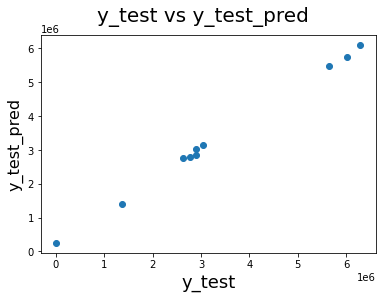

In [261]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [262]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

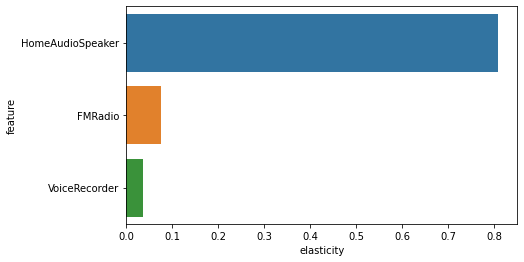

In [263]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

### Building the Multiplicative Model

#### 1. Camera Accessory - Multiplicative Model

In [264]:
cameraAcc_final.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,13.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,433.0,0.0,226.0,17.0,0.0,366.0,0.0,0.0,13.0,16.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,491.0,0.0,188.0,23.0,0.0,382.0,0.0,0.0,24.0,22.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,457.0,0.0,194.0,18.0,0.0,423.0,0.0,0.0,23.0,30.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,363.0,0.0,112.0,26.0,0.0,233.0,0.0,0.0,23.0,13.0


In [265]:
# Replacing '0' values with '0.000001' in order to avoide null values after performing the log transform of the dataset
# Performing log transformation of the dataset & dropping the features which not in control of the company
cameraAcc_model2 = np.log(cameraAcc_final.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [266]:
#Test-train split
df_train, df_test = train_test_split(cameraAcc_model2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [267]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [268]:
cameraAcc_model2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [269]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [270]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [271]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['order_week', 'adStock_TV', 'adStock_Digital',
       'adStock_Content Marketing', 'adStock_Online marketing', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'discount',
       'total_premiumn_products', 'Binoculars', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraTripod', 'Flash',
       'Lens', 'Telescope'],
      dtype='object')

In [272]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [273]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4682.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.82e-32
Time:                        17:00:24   Log-Likelihood:                 100.40
No. Observations:                  41   AIC:                            -158.8
Df Residuals:                      20   BIC:                            -122.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,10241.62
7,adStock_Radio,3860.97
8,adStock_Other,3686.64
14,CameraBattery,1716.17
13,CameraBag,1705.36
15,CameraBatteryCharger,819.46
11,total_premiumn_products,674.36
12,Binoculars,664.75
17,CameraTripod,518.87
18,Flash,220.27


In [274]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5116.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.78e-34
Time:                        17:00:24   Log-Likelihood:                 100.17
No. Observations:                  41   AIC:                            -160.3
Df Residuals:                      21   BIC:                            -126.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,8908.34
6,adStock_Radio,2077.60
7,adStock_Other,1978.67
12,CameraBag,1680.98
13,CameraBattery,1606.31
14,CameraBatteryCharger,819.38
11,Binoculars,649.76
10,total_premiumn_products,620.95
16,CameraTripod,516.64
17,Flash,207.26


In [275]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["Binoculars"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5430.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.66e-36
Time:                        17:00:24   Log-Likelihood:                 99.329
No. Observations:                  41   AIC:                            -160.7
Df Residuals:                      22   BIC:                            -128.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,8426.62
6,adStock_Radio,1627.13
12,CameraBattery,1604.70
7,adStock_Other,1557.36
11,CameraBag,1149.31
13,CameraBatteryCharger,812.49
10,total_premiumn_products,600.64
15,CameraTripod,507.53
16,Flash,202.60
17,Lens,187.87


In [276]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5506.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.95e-37
Time:                        17:00:24   Log-Likelihood:                 97.533
No. Observations:                  41   AIC:                            -159.1
Df Residuals:                      23   BIC:                            -128.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,7362.60
11,CameraBattery,1603.96
10,CameraBag,1125.96
12,CameraBatteryCharger,804.00
9,total_premiumn_products,599.85
14,CameraTripod,504.47
15,Flash,196.42
16,Lens,185.08
17,Telescope,151.54
4,adStock_Online marketing,109.85


In [277]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5932.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.43e-39
Time:                        17:00:24   Log-Likelihood:                 96.944
No. Observations:                  41   AIC:                            -159.9
Df Residuals:                      24   BIC:                            -130.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,6985.99
10,CameraBattery,1594.26
9,CameraBag,1117.30
11,CameraBatteryCharger,797.53
8,total_premiumn_products,554.66
13,CameraTripod,423.34
14,Flash,196.42
15,Lens,156.65
16,Telescope,151.14
4,adStock_Online marketing,108.68


In [278]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5903.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.63e-40
Time:                        17:00:24   Log-Likelihood:                 94.685
No. Observations:                  41   AIC:                            -157.4
Df Residuals:                      25   BIC:                            -130.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,5119.21
9,CameraBattery,1482.30
8,CameraBag,1021.26
10,CameraBatteryCharger,707.85
12,CameraTripod,411.34
7,total_premiumn_products,400.45
13,Flash,177.81
14,Lens,145.72
15,Telescope,112.76
4,adStock_Online marketing,108.22


In [279]:
# Removing the feature with higher VIF value
X_train_v7 = X_train_v6.drop(["Telescope"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5900.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.03e-42
Time:                        17:00:24   Log-Likelihood:                 92.456
No. Observations:                  41   AIC:                            -154.9
Df Residuals:                      26   BIC:                            -129.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,5045.53
9,CameraBattery,1270.93
8,CameraBag,907.21
10,CameraBatteryCharger,693.95
12,CameraTripod,409.56
7,total_premiumn_products,400.03
13,Flash,135.07
14,Lens,134.34
4,adStock_Online marketing,100.37
11,CameraBatteryGrip,69.34


In [280]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["Lens"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6227.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.10e-43
Time:                        17:00:24   Log-Likelihood:                 91.270
No. Observations:                  41   AIC:                            -154.5
Df Residuals:                      27   BIC:                            -130.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,4038.91
9,CameraBattery,1165.07
10,CameraBatteryCharger,532.70
8,CameraBag,455.15
12,CameraTripod,398.95
7,total_premiumn_products,143.21
13,Flash,123.61
4,adStock_Online marketing,96.95
11,CameraBatteryGrip,57.41
2,adStock_TV,39.82


In [281]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["CameraBattery"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6267.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.14e-44
Time:                        17:00:24   Log-Likelihood:                 89.016
No. Observations:                  41   AIC:                            -152.0
Df Residuals:                      28   BIC:                            -129.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,4014.05
9,CameraBatteryCharger,348.86
11,CameraTripod,334.90
8,CameraBag,315.26
7,total_premiumn_products,137.58
12,Flash,121.71
4,adStock_Online marketing,82.05
10,CameraBatteryGrip,57.41
2,adStock_TV,36.34
1,order_week,26.40


In [282]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["Flash"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6518.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.35e-46
Time:                        17:00:24   Log-Likelihood:                 87.317
No. Observations:                  41   AIC:                            -150.6
Df Residuals:                      29   BIC:                            -130.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3372.30
9,CameraBatteryCharger,342.47
11,CameraTripod,320.75
8,CameraBag,296.17
7,total_premiumn_products,97.03
4,adStock_Online marketing,79.24
10,CameraBatteryGrip,38.83
2,adStock_TV,36.20
1,order_week,23.56
5,adStock_SEM,22.95


In [283]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["CameraBatteryGrip"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6994.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.18e-47
Time:                        17:00:24   Log-Likelihood:                 86.114
No. Observations:                  41   AIC:                            -150.2
Df Residuals:                      30   BIC:                            -131.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3252.62
9,CameraBatteryCharger,341.31
10,CameraTripod,300.63
8,CameraBag,269.44
4,adStock_Online marketing,68.63
2,adStock_TV,33.19
1,order_week,23.35
5,adStock_SEM,20.71
7,total_premiumn_products,16.85
3,adStock_Digital,14.41


In [284]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v12 = X_train_v11.drop(["CameraBatteryCharger"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4128.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.79e-45
Time:                        17:00:24   Log-Likelihood:                 72.483
No. Observations:                  41   AIC:                            -125.0
Df Residuals:                      31   BIC:                            -107.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2062.54
9,CameraTripod,213.08
8,CameraBag,201.56
4,adStock_Online marketing,54.73
2,adStock_TV,31.89
5,adStock_SEM,20.27
1,order_week,15.14
3,adStock_Digital,14.01
7,total_premiumn_products,11.79
6,discount,4.38


In [285]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["CameraBag"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4792.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.29e-47
Time:                        17:00:24   Log-Likelihood:                 72.476
No. Observations:                  41   AIC:                            -127.0
Df Residuals:                      32   BIC:                            -111.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,939.18
4,adStock_Online marketing,54.12
2,adStock_TV,28.05
5,adStock_SEM,20.05
3,adStock_Digital,13.89
8,CameraTripod,10.30
7,total_premiumn_products,9.07
1,order_week,7.20
6,discount,2.49


In [286]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["order_week"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5640.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.91e-49
Time:                        17:00:24   Log-Likelihood:                 72.445
No. Observations:                  41   AIC:                            -128.9
Df Residuals:                      33   BIC:                            -115.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,58.24
3,adStock_Online marketing,41.57
1,adStock_TV,26.76
4,adStock_SEM,15.46
2,adStock_Digital,12.97
6,total_premiumn_products,6.46
7,CameraTripod,5.45
5,discount,1.46


In [287]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6437.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.93e-50
Time:                        17:00:25   Log-Likelihood:                 71.384
No. Observations:                  41   AIC:                            -128.8
Df Residuals:                      34   BIC:                            -116.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,51.14
3,adStock_SEM,8.79
1,adStock_Digital,7.05
5,total_premiumn_products,6.19
6,CameraTripod,5.01
2,adStock_Online marketing,4.30
4,discount,1.43


In [288]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v16 = X_train_v15.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5918.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.56e-50
Time:                        17:00:25   Log-Likelihood:                 65.336
No. Observations:                  41   AIC:                            -118.7
Df Residuals:                      35   BIC:                            -108.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,41.20
4,total_premiumn_products,6.17
5,CameraTripod,4.85
2,adStock_Online marketing,2.45
3,discount,1.38
1,adStock_Digital,1.10


In [289]:
# Removing the feature with higher p-value
X_train_v17 = X_train_v16.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7606.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.84e-52
Time:                        17:00:25   Log-Likelihood:                 65.329
No. Observations:                  41   AIC:                            -120.7
Df Residuals:                      36   BIC:                            -112.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,40.58
3,total_premiumn_products,6.10
4,CameraTripod,4.69
1,adStock_Online marketing,2.43
2,discount,1.30


In [290]:
# Removing the feature with higher p-value
X_train_v18 = X_train_v17.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.49e-54
Time:                        17:00:25   Log-Likelihood:                 65.313
No. Observations:                  41   AIC:                            -122.6
Df Residuals:                      37   BIC:                            -115.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,39.34
2,total_premiumn_products,4.84
3,CameraTripod,4.68
1,discount,1.21


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Multiplicative model.

### Model Evaluation (Multiplicative Model)
#### Camera Accessory

In [291]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumn_products', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'Binoculars', 'CameraAccessory',
       'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [292]:
X_train_lm.columns

Index(['const', 'discount', 'total_premiumn_products', 'CameraTripod'], dtype='object')

In [293]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,discount,total_premiumn_products,CameraTripod
6,1.0,1.910562,0.000000,0.640294
32,1.0,0.471137,8.686092,0.947843
38,1.0,0.615377,8.539150,0.933651
35,1.0,0.629203,8.581482,0.938435
33,1.0,0.757873,8.585786,0.947416
51,1.0,0.607790,7.491088,0.847801
5,1.0,0.622822,0.000000,0.640294
26,1.0,0.596127,8.508354,0.949281
25,1.0,0.356559,8.239857,0.942018
45,1.0,0.819064,8.488382,0.920565


In [294]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [295]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9993695470922679

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

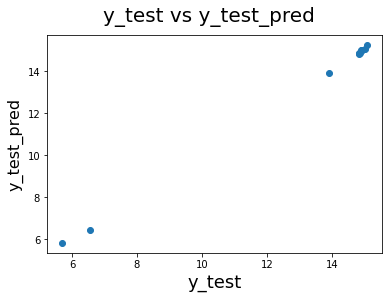

In [296]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [297]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

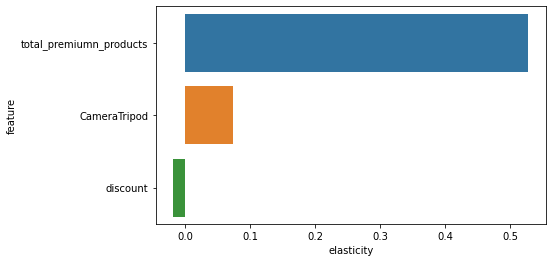

In [298]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### 2. Gaming Accessory - Multiplicative Model

In [299]:
gamingAcc_final.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,GamingChargingStation,GamingHeadset,GamingKeyboard,GamingMemoryCard,GamingMouse,GamingMousePad,GamingSpeaker,JoystickGamingWheel,MotionController,TVOutCableAccessory
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,0.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,0.0,177.0,424.0,36.0,966.0,55.0,0.0,11.0,16.0,73.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,0.0,179.0,162.0,27.0,357.0,48.0,0.0,8.0,11.0,92.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,0.0,283.0,170.0,28.0,448.0,67.0,0.0,9.0,11.0,93.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,0.0,424.0,71.0,11.0,232.0,39.0,1.0,17.0,8.0,79.0


In [300]:
# Replacing '0' values with '0.000001' in order to avoide null values after performing the log transform of the dataset
# Performing log transformation of the dataset & dropping the features which not in control of the company
gamingAcc_model2 = np.log(gamingAcc_final.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [301]:
#Test-train split
df_train, df_test = train_test_split(gamingAcc_model2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [302]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [303]:
gamingAcc_model2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [304]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [305]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [306]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Sponsorship', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_Radio', 'adStock_Other', 'NPS',
       'discount', 'total_premiumn_products', 'total_holidays', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingHeadset',
       'GamingKeyboard', 'GamingMouse', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [307]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [308]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2988.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.69e-32
Time:                        17:00:25   Log-Likelihood:                 83.789
No. Observations:                  42   AIC:                            -125.6
Df Residuals:                      21   BIC:                            -89.09
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.882225e+11
4,adStock_Online marketing,8.371450e+03
5,adStock_ Affiliates,7.877710e+03
7,adStock_Other,3.890280e+03
6,adStock_Radio,3.672370e+03
10,total_premiumn_products,1.273640e+03
13,GamingAccessoryKit,7.808800e+02
15,GamingHeadset,5.731500e+02
17,GamingMouse,4.958300e+02
14,GamingAdapter,4.513900e+02


In [309]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3280.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.20e-33
Time:                        17:00:25   Log-Likelihood:                 83.690
No. Observations:                  42   AIC:                            -127.4
Df Residuals:                      22   BIC:                            -92.63
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.777269e+11
4,adStock_Online marketing,6.519930e+03
5,adStock_ Affiliates,6.436930e+03
9,total_premiumn_products,9.795000e+02
12,GamingAccessoryKit,5.874500e+02
14,GamingHeadset,5.179100e+02
16,GamingMouse,4.610000e+02
13,GamingAdapter,4.459700e+02
19,TVOutCableAccessory,2.821000e+02
11,GamePad,2.573900e+02


In [310]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3552.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.41e-35
Time:                        17:00:26   Log-Likelihood:                 83.295
No. Observations:                  42   AIC:                            -128.6
Df Residuals:                      23   BIC:                            -95.57
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.207367e+11
5,adStock_ Affiliates,4.088490e+03
4,adStock_Online marketing,3.907610e+03
8,total_premiumn_products,9.531600e+02
11,GamingAccessoryKit,5.612300e+02
13,GamingHeadset,4.628600e+02
12,GamingAdapter,4.227000e+02
15,GamingMouse,4.223900e+02
18,TVOutCableAccessory,2.755600e+02
10,GamePad,2.567600e+02


In [311]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["total_holidays"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3761.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.25e-37
Time:                        17:00:26   Log-Likelihood:                 82.402
No. Observations:                  42   AIC:                            -128.8
Df Residuals:                      24   BIC:                            -97.53
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.204493e+11
5,adStock_ Affiliates,4.025010e+03
4,adStock_Online marketing,3.836320e+03
8,total_premiumn_products,9.256100e+02
10,GamingAccessoryKit,5.477600e+02
12,GamingHeadset,4.580800e+02
14,GamingMouse,4.182600e+02
11,GamingAdapter,4.035000e+02
17,TVOutCableAccessory,2.750700e+02
9,GamePad,2.513300e+02


In [312]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3900.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.13e-38
Time:                        17:00:26   Log-Likelihood:                 81.034
No. Observations:                  42   AIC:                            -128.1
Df Residuals:                      25   BIC:                            -98.53
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.193512e+11
3,adStock_Online marketing,2.747660e+03
4,adStock_ Affiliates,2.573920e+03
7,total_premiumn_products,8.813100e+02
9,GamingAccessoryKit,4.947800e+02
11,GamingHeadset,4.303400e+02
10,GamingAdapter,3.965100e+02
13,GamingMouse,3.845700e+02
8,GamePad,2.415000e+02
12,GamingKeyboard,2.163400e+02


In [313]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["GamePad"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3964.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.85e-40
Time:                        17:00:26   Log-Likelihood:                 79.197
No. Observations:                  42   AIC:                            -126.4
Df Residuals:                      26   BIC:                            -98.59
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.156222e+11
3,adStock_Online marketing,2.739110e+03
4,adStock_ Affiliates,2.564470e+03
9,GamingAdapter,3.902200e+02
8,GamingAccessoryKit,3.334600e+02
7,total_premiumn_products,3.184200e+02
10,GamingHeadset,2.332000e+02
11,GamingKeyboard,2.049600e+02
15,TVOutCableAccessory,1.983800e+02
12,GamingMouse,1.954300e+02


In [314]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["GamingAccessoryKit"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4163.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.14e-41
Time:                        17:00:26   Log-Likelihood:                 77.989
No. Observations:                  42   AIC:                            -126.0
Df Residuals:                      27   BIC:                            -99.91
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.047714e+11
3,adStock_Online marketing,2.732690e+03
4,adStock_ Affiliates,2.560420e+03
8,GamingAdapter,3.778800e+02
7,total_premiumn_products,2.280100e+02
14,TVOutCableAccessory,1.910200e+02
10,GamingKeyboard,1.717200e+02
1,Year,1.111300e+02
5,adStock_Radio,1.097100e+02
9,GamingHeadset,1.005300e+02


In [315]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["GamingMouse"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4449.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.29e-43
Time:                        17:00:26   Log-Likelihood:                 77.062
No. Observations:                  42   AIC:                            -126.1
Df Residuals:                      28   BIC:                            -101.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,1.047617e+11
3,adStock_Online marketing,2.666340e+03
4,adStock_ Affiliates,2.536650e+03
8,GamingAdapter,3.684700e+02
7,total_premiumn_products,2.114800e+02
13,TVOutCableAccessory,1.849100e+02
1,Year,1.111300e+02
5,adStock_Radio,1.094800e+02
11,JoystickGamingWheel,7.309000e+01
12,MotionController,6.932000e+01


In [316]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["MotionController"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4630.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.39e-44
Time:                        17:00:26   Log-Likelihood:                 75.483
No. Observations:                  42   AIC:                            -125.0
Df Residuals:                      29   BIC:                            -102.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,9.930650e+10
3,adStock_Online marketing,2.260520e+03
4,adStock_ Affiliates,2.099960e+03
8,GamingAdapter,3.128800e+02
7,total_premiumn_products,2.003300e+02
12,TVOutCableAccessory,1.831100e+02
1,Year,1.053400e+02
5,adStock_Radio,1.046700e+02
11,JoystickGamingWheel,7.213000e+01
10,GamingKeyboard,4.329000e+01


In [317]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4926.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.10e-45
Time:                        17:00:26   Log-Likelihood:                 74.247
No. Observations:                  42   AIC:                            -124.5
Df Residuals:                      30   BIC:                            -103.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,7.851806e+10
2,adStock_Online marketing,1.563480e+03
3,adStock_ Affiliates,1.541930e+03
7,GamingAdapter,3.059100e+02
6,total_premiumn_products,2.002600e+02
11,TVOutCableAccessory,1.787600e+02
1,Year,8.329000e+01
4,adStock_Radio,7.554000e+01
10,JoystickGamingWheel,7.204000e+01
9,GamingKeyboard,4.240000e+01


In [318]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5265.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.69e-47
Time:                        17:00:26   Log-Likelihood:                 72.955
No. Observations:                  42   AIC:                            -123.9
Df Residuals:                      31   BIC:                            -104.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,6.708823e+10
6,GamingAdapter,2.128400e+02
5,total_premiumn_products,1.949900e+02
10,TVOutCableAccessory,1.732400e+02
1,Year,7.116000e+01
3,adStock_Radio,6.892000e+01
8,GamingKeyboard,4.231000e+01
9,JoystickGamingWheel,3.599000e+01
7,GamingHeadset,9.030000e+00
4,discount,4.670000e+00


In [319]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["TVOutCableAccessory"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5763.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.68e-49
Time:                        17:00:26   Log-Likelihood:                 71.972
No. Observations:                  42   AIC:                            -123.9
Df Residuals:                      32   BIC:                            -106.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,6.670665e+10
5,total_premiumn_products,1.847600e+02
6,GamingAdapter,7.566000e+01
1,Year,7.076000e+01
3,adStock_Radio,6.789000e+01
8,GamingKeyboard,4.019000e+01
9,JoystickGamingWheel,3.593000e+01
7,GamingHeadset,8.820000e+00
4,discount,4.390000e+00
2,adStock_Online marketing,4.290000e+00


In [320]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["GamingAdapter"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6453.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.04e-50
Time:                        17:00:26   Log-Likelihood:                 71.228
No. Observations:                  42   AIC:                            -124.5
Df Residuals:                      33   BIC:                            -108.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,6.489991e+10
5,total_premiumn_products,1.060500e+02
1,Year,6.884000e+01
3,adStock_Radio,6.585000e+01
7,GamingKeyboard,3.181000e+01
8,JoystickGamingWheel,1.755000e+01
6,GamingHeadset,7.560000e+00
4,discount,3.850000e+00
2,adStock_Online marketing,3.810000e+00


In [321]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6954.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.01e-51
Time:                        17:00:26   Log-Likelihood:                 69.371
No. Observations:                  42   AIC:                            -122.7
Df Residuals:                      34   BIC:                            -108.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

,Features,VIF
0,const,6.400341e+10
4,total_premiumn_products,8.039000e+01
1,Year,6.789000e+01
2,adStock_Radio,6.562000e+01
6,GamingKeyboard,2.576000e+01
7,JoystickGamingWheel,1.674000e+01
5,GamingHeadset,7.450000e+00
3,discount,3.420000e+00


In [322]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v15 = X_train_v14.drop(["total_premiumn_products"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     885.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.06e-36
Time:                        17:00:26   Log-Likelihood:                 22.372
No. Observations:                  42   AIC:                            -30.74
Df Residuals:                      35   BIC:                            -18.58
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 2.15e+04   5

,Features,VIF
0,const,5.029763e+10
2,adStock_Radio,5.394000e+01
1,Year,5.335000e+01
5,GamingKeyboard,7.640000e+00
6,JoystickGamingWheel,6.490000e+00
4,GamingHeadset,4.500000e+00
3,discount,1.640000e+00


In [323]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v16 = X_train_v15.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     804.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           7.23e-36
Time:                        17:00:26   Log-Likelihood:                 15.984
No. Observations:                  42   AIC:                            -19.97
Df Residuals:                      36   BIC:                            -9.542
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2744.3590    

,Features,VIF
0,const,1.236492e+09
4,GamingKeyboard,7.640000e+00
5,JoystickGamingWheel,6.400000e+00
3,GamingHeadset,4.440000e+00
2,discount,1.610000e+00
1,Year,1.310000e+00


In [324]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v17 = X_train_v16.drop(["GamingKeyboard"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.44e-26
Time:                        17:00:26   Log-Likelihood:                -14.505
No. Observations:                  42   AIC:                             39.01
Df Residuals:                      37   BIC:                             47.70
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2106.2331   1

,Features,VIF
0,const,1.231940e+09
4,JoystickGamingWheel,3.490000e+00
3,GamingHeadset,3.380000e+00
1,Year,1.310000e+00
2,discount,1.290000e+00


In [325]:
# Removing the feature with higher p-value
X_train_v18 = X_train_v17.drop(["discount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     321.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.87e-27
Time:                        17:00:26   Log-Likelihood:                -14.519
No. Observations:                  42   AIC:                             37.04
Df Residuals:                      38   BIC:                             43.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2217.4129   1

,Features,VIF
0,const,1.071345e+09
3,JoystickGamingWheel,3.210000e+00
2,GamingHeadset,3.180000e+00
1,Year,1.140000e+00


In [326]:
# Removing the feature with higher p-value
X_train_v19 = X_train_v18.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v19)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     475.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.07e-28
Time:                        17:00:26   Log-Likelihood:                -15.323
No. Observations:                  42   AIC:                             36.65
Df Residuals:                      39   BIC:                             41.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1261    

,Features,VIF
0,const,38.25
1,GamingHeadset,3.16
2,JoystickGamingWheel,3.16


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Multiplicative model.

### Model Evaluation (Multiplicative Model)
#### Gaming Accessory

In [327]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumn_products', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'CoolingPad', 'GameControlMount',
       'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [328]:
X_train_lm.columns

Index(['const', 'GamingHeadset', 'JoystickGamingWheel'], dtype='object')

In [329]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,GamingHeadset,JoystickGamingWheel
25,1.0,0.979489,0.898211
48,1.0,0.956043,0.995740
52,1.0,0.917724,0.961143
37,1.0,0.940164,0.909134
6,1.0,0.630047,0.000000
18,1.0,0.946507,0.878865
20,1.0,0.935573,0.865644
46,1.0,0.976453,0.975971
5,1.0,0.630047,0.000000
31,1.0,0.966477,0.865644


In [330]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [331]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9431285896643595

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

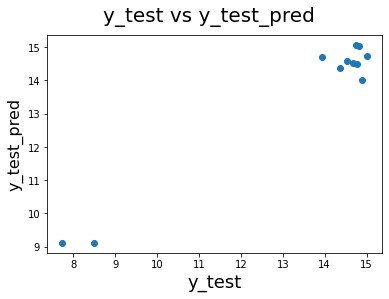

In [332]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a decent linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [333]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

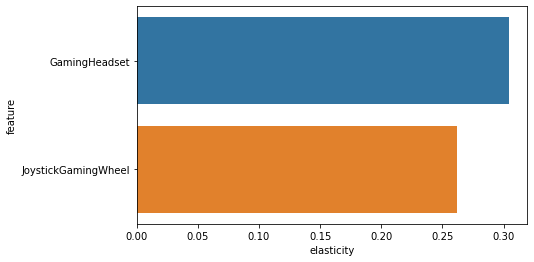

In [334]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### 3. Home Audio - Multiplicative Model

In [335]:
homeAudio_final.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,4.0,0.0,0.0,0.0,2.0,0.0,26.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,60.0,0.0,30.0,1.0,478.0,13.0,1281.0,0.0,0.0,25.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,57.0,0.0,50.0,1.0,532.0,27.0,1511.0,0.0,0.0,26.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,65.0,0.0,56.0,0.0,509.0,20.0,1332.0,0.0,0.0,22.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,37.0,0.0,44.0,0.0,372.0,11.0,939.0,0.0,0.0,16.0


In [336]:
# Replacing '0' values with '0.000001' in order to avoide null values after performing the log transform of the dataset
# Performing log transformation of the dataset & dropping the features which not in control of the company
homeAudio_model2 = np.log(homeAudio_final.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [337]:
#Test-train split
df_train, df_test = train_test_split(homeAudio_model2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [338]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [339]:
homeAudio_model2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [340]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [341]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [342]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'NPS', 'BoomBox', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [343]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [344]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2749.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.77e-29
Time:                        17:00:27   Log-Likelihood:                 116.62
No. Observations:                  40   AIC:                            -191.2
Df Residuals:                      19   BIC:                            -155.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.174567e+11
6,adStock_Online marketing,1.851995e+04
7,adStock_ Affiliates,1.557983e+04
10,adStock_Other,2.940140e+03
9,adStock_Radio,2.868780e+03
1,Year,3.366700e+02
5,adStock_Content Marketing,3.217500e+02
20,VoiceRecorder,1.943300e+02
2,adStock_TV,1.409600e+02
14,Dock,1.391100e+02


In [345]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3045.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.55e-30
Time:                        17:00:27   Log-Likelihood:                 116.62
No. Observations:                  40   AIC:                            -193.2
Df Residuals:                      20   BIC:                            -159.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3.082335e+11
6,adStock_ Affiliates,4.275460e+03
5,adStock_Online marketing,4.009960e+03
9,adStock_Other,2.575540e+03
8,adStock_Radio,2.328760e+03
1,Year,3.268900e+02
19,VoiceRecorder,1.839900e+02
13,Dock,1.368400e+02
2,adStock_TV,1.099400e+02
16,HiFiSystem,1.075600e+02


In [346]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["DockingStation"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.20e-32
Time:                        17:00:27   Log-Likelihood:                 116.22
No. Observations:                  40   AIC:                            -194.4
Df Residuals:                      21   BIC:                            -162.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3.080754e+11
6,adStock_ Affiliates,4.224390e+03
5,adStock_Online marketing,3.937830e+03
9,adStock_Other,2.575490e+03
8,adStock_Radio,2.326980e+03
1,Year,3.267200e+02
18,VoiceRecorder,1.622500e+02
13,Dock,1.128000e+02
2,adStock_TV,1.089800e+02
15,HiFiSystem,1.075600e+02


In [347]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["VoiceRecorder"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3564.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           7.11e-34
Time:                        17:00:27   Log-Likelihood:                 115.63
No. Observations:                  40   AIC:                            -195.3
Df Residuals:                      22   BIC:                            -164.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.212419e+11
6,adStock_ Affiliates,4.053250e+03
5,adStock_Online marketing,3.842800e+03
8,adStock_Radio,2.139960e+03
9,adStock_Other,2.125410e+03
1,Year,2.346300e+02
2,adStock_TV,9.643000e+01
15,HiFiSystem,7.232000e+01
13,Dock,6.337000e+01
14,FMRadio,4.389000e+01


In [348]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["BoomBox"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3874.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.41e-35
Time:                        17:00:27   Log-Likelihood:                 115.20
No. Observations:                  40   AIC:                            -196.4
Df Residuals:                      23   BIC:                            -167.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.140494e+11
6,adStock_ Affiliates,3.603920e+03
5,adStock_Online marketing,3.451380e+03
8,adStock_Radio,2.134890e+03
9,adStock_Other,2.091200e+03
1,Year,2.270100e+02
2,adStock_TV,9.536000e+01
14,HiFiSystem,7.138000e+01
12,Dock,6.335000e+01
13,FMRadio,4.236000e+01


In [349]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["Dock"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4210.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.79e-37
Time:                        17:00:27   Log-Likelihood:                 114.72
No. Observations:                  40   AIC:                            -197.4
Df Residuals:                      24   BIC:                            -170.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.054000e+11
6,adStock_ Affiliates,3.290470e+03
5,adStock_Online marketing,3.196010e+03
8,adStock_Radio,2.130160e+03
9,adStock_Other,2.089570e+03
1,Year,2.178300e+02
2,adStock_TV,8.774000e+01
12,FMRadio,3.933000e+01
13,HiFiSystem,2.961000e+01
7,adStock_SEM,2.227000e+01


In [350]:
# Removing the feature with higher VIF value
X_train_v7 = X_train_v6.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.76e-38
Time:                        17:00:28   Log-Likelihood:                 112.34
No. Observations:                  40   AIC:                            -194.7
Df Residuals:                      25   BIC:                            -169.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6048.8045   1

,Features,VIF
0,const,2.013457e+11
7,adStock_Radio,2.130000e+03
8,adStock_Other,2.089500e+03
1,Year,2.135300e+02
2,adStock_TV,6.519000e+01
5,adStock_ Affiliates,4.857000e+01
11,FMRadio,3.767000e+01
12,HiFiSystem,2.538000e+01
6,adStock_SEM,2.217000e+01
3,adStock_Digital,1.780000e+01


In [351]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["HiFiSystem"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.09e-39
Time:                        17:00:28   Log-Likelihood:                 110.07
No. Observations:                  40   AIC:                            -192.1
Df Residuals:                      26   BIC:                            -168.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6947.0535   1

,Features,VIF
0,const,1.697774e+11
8,adStock_Other,1.679240e+03
7,adStock_Radio,1.481730e+03
1,Year,1.800500e+02
2,adStock_TV,5.892000e+01
5,adStock_ Affiliates,4.663000e+01
11,FMRadio,2.691000e+01
6,adStock_SEM,1.985000e+01
10,NPS,1.429000e+01
3,adStock_Digital,1.258000e+01


In [352]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4274.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.43e-41
Time:                        17:00:28   Log-Likelihood:                 108.21
No. Observations:                  40   AIC:                            -190.4
Df Residuals:                      27   BIC:                            -168.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6886.3250   1

,Features,VIF
0,const,1.696207e+11
1,Year,1.798800e+02
7,adStock_Other,1.576400e+02
5,adStock_ Affiliates,4.173000e+01
2,adStock_TV,3.742000e+01
10,FMRadio,2.527000e+01
6,adStock_SEM,1.888000e+01
11,HomeAudioSpeaker,1.178000e+01
9,NPS,1.177000e+01
3,adStock_Digital,1.130000e+01


In [353]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4660.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.27e-42
Time:                        17:00:28   Log-Likelihood:                 107.47
No. Observations:                  40   AIC:                            -190.9
Df Residuals:                      28   BIC:                            -170.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7639.9961   1

,Features,VIF
0,const,1.118587e+11
1,Year,1.186200e+02
7,adStock_Other,1.179600e+02
5,adStock_ Affiliates,3.969000e+01
2,adStock_TV,3.725000e+01
9,FMRadio,2.458000e+01
6,adStock_SEM,1.749000e+01
10,HomeAudioSpeaker,1.172000e+01
3,adStock_Digital,1.086000e+01
8,sla,8.620000e+00


In [354]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v11 = X_train_v10.drop(["Year"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1812.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.72e-38
Time:                        17:00:28   Log-Likelihood:                 85.988
No. Observations:                  40   AIC:                            -150.0
Df Residuals:                      29   BIC:                            -131.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2453    

,Features,VIF
0,const,44.69
4,adStock_ Affiliates,34.08
1,adStock_TV,30.96
8,FMRadio,23.67
5,adStock_SEM,13.81
9,HomeAudioSpeaker,10.98
2,adStock_Digital,8.85
7,sla,8.41
3,adStock_Sponsorship,6.57
6,adStock_Other,3.01


In [355]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2072.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.22e-39
Time:                        17:00:28   Log-Likelihood:                 85.887
No. Observations:                  40   AIC:                            -151.8
Df Residuals:                      30   BIC:                            -134.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2393    

,Features,VIF
0,const,35.63
1,adStock_TV,22.47
7,FMRadio,20.56
4,adStock_ Affiliates,19.28
8,HomeAudioSpeaker,10.19
6,sla,7.20
3,adStock_Sponsorship,4.78
5,adStock_Other,3.00
2,adStock_Digital,2.33
9,SoundMixer,2.22


In [356]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2405.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.46e-41
Time:                        17:00:28   Log-Likelihood:                 85.854
No. Observations:                  40   AIC:                            -153.7
Df Residuals:                      31   BIC:                            -138.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2397    

,Features,VIF
0,const,35.50
3,adStock_ Affiliates,18.69
1,adStock_TV,18.19
6,FMRadio,17.61
7,HomeAudioSpeaker,9.55
5,sla,6.00
4,adStock_Other,2.36
2,adStock_Digital,2.07
8,SoundMixer,1.80


In [357]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2812.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.19e-43
Time:                        17:00:28   Log-Likelihood:                 85.682
No. Observations:                  40   AIC:                            -155.4
Df Residuals:                      32   BIC:                            -141.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2390    

,Features,VIF
0,const,35.44
5,FMRadio,15.67
6,HomeAudioSpeaker,7.85
4,sla,5.88
3,adStock_Other,2.35
2,adStock_ Affiliates,2.32
1,adStock_Digital,1.93
7,SoundMixer,1.27


In [358]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3324.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.02e-44
Time:                        17:00:28   Log-Likelihood:                 85.328
No. Observations:                  40   AIC:                            -156.7
Df Residuals:                      33   BIC:                            -144.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2359    

,Features,VIF
0,const,34.78
4,FMRadio,15.67
5,HomeAudioSpeaker,7.72
3,sla,5.87
1,adStock_ Affiliates,2.28
2,adStock_Other,1.49
6,SoundMixer,1.26


In [359]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v16 = X_train_v15.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3821.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.02e-45
Time:                        17:00:28   Log-Likelihood:                 83.872
No. Observations:                  40   AIC:                            -155.7
Df Residuals:                      34   BIC:                            -145.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2431    

,Features,VIF
0,const,33.96
3,FMRadio,15.65
4,HomeAudioSpeaker,7.67
2,sla,5.50
1,adStock_ Affiliates,2.24
5,SoundMixer,1.20


In [360]:
# Removing the feature with higher p-value
X_train_v17 = X_train_v16.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4608.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.23e-47
Time:                        17:00:28   Log-Likelihood:                 82.578
No. Observations:                  40   AIC:                            -155.2
Df Residuals:                      35   BIC:                            -146.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.2414      0.030  

,Features,VIF
0,const,33.91
2,FMRadio,12.51
3,HomeAudioSpeaker,7.67
1,sla,3.35
4,SoundMixer,1.15


In [361]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v18 = X_train_v17.drop(["FMRadio"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2701.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.05e-42
Time:                        17:00:28   Log-Likelihood:                 65.628
No. Observations:                  40   AIC:                            -123.3
Df Residuals:                      36   BIC:                            -116.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.3044      0.043  

,Features,VIF
0,const,30.76
1,sla,1.48
2,HomeAudioSpeaker,1.38
3,SoundMixer,1.08


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Multiplicative model.

### Model Evaluation (Multiplicative Model)
#### Home Audio

In [362]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumn_products', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'BoomBox', 'DJController', 'Dock',
       'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [363]:
X_train_lm.columns

Index(['const', 'sla', 'HomeAudioSpeaker', 'SoundMixer'], dtype='object')

In [364]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,sla,HomeAudioSpeaker,SoundMixer
6,1.0,0.660658,0.680634,0.000000
36,1.0,0.624348,0.693454,0.000000
37,1.0,0.700357,0.663544,0.000000
28,1.0,0.500624,0.842668,0.000000
43,1.0,0.533802,0.664525,0.972813
49,1.0,0.265305,0.540013,0.000000
5,1.0,1.184913,-0.602570,0.000000
33,1.0,0.599476,0.817245,0.000000
20,1.0,0.512121,0.835121,0.000000
42,1.0,0.543365,0.685065,1.019289


In [365]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [366]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9940378512587073

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

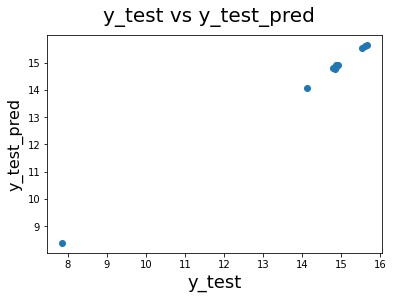

In [367]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [368]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

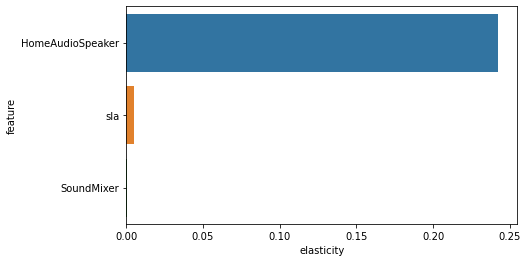

In [369]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

### Building the Distributed Lag Model

In [370]:
# Defining the function to create features for the Distributed Lag Model
def getDistributedLagFeatures(df):
    df['adStock_TV_lag1'] = df['adStock_TV'].shift(1)
    df['adStock_TV_lag2'] = df['adStock_TV'].shift(2)
    df['adStock_TV_lag3'] = df['adStock_TV'].shift(3)
    
    df['adStock_Digital_lag1'] = df['adStock_Digital'].shift(1)
    df['adStock_Digital_lag2'] = df['adStock_Digital'].shift(2)
    df['adStock_Digital_lag3'] = df['adStock_Digital'].shift(3)
    
    df['adStock_Sponsorship_lag1'] = df['adStock_Sponsorship'].shift(1)
    df['adStock_Sponsorship_lag2'] = df['adStock_Sponsorship'].shift(2)
    df['adStock_Sponsorship_lag3'] = df['adStock_Sponsorship'].shift(3)
    
    df['adStock_Content Marketing_lag1'] = df['adStock_Content Marketing'].shift(1)
    df['adStock_Content Marketing_lag2'] = df['adStock_Content Marketing'].shift(2)
    df['adStock_Content Marketing_lag3'] = df['adStock_Content Marketing'].shift(3)
    
    df['adStock_Online marketing_lag1'] = df['adStock_Online marketing'].shift(1)    
    df['adStock_Online marketing_lag2'] = df['adStock_Online marketing'].shift(2)    
    df['adStock_Online marketing_lag3'] = df['adStock_Online marketing'].shift(3)    
    
    df['adStock_ Affiliates_lag1'] = df['adStock_ Affiliates'].shift(1)
    df['adStock_ Affiliates_lag2'] = df['adStock_ Affiliates'].shift(2)
    df['adStock_ Affiliates_lag3'] = df['adStock_ Affiliates'].shift(3)
    
    df['adStock_SEM_lag1'] = df['adStock_SEM'].shift(1)   
    df['adStock_SEM_lag2'] = df['adStock_SEM'].shift(2)
    df['adStock_SEM_lag3'] = df['adStock_SEM'].shift(3)
    
    df['adStock_Other_lag1'] = df['adStock_Other'].shift(1)   
    df['adStock_Other_lag2'] = df['adStock_Other'].shift(2)
    df['adStock_Other_lag3'] = df['adStock_Other'].shift(3)
    
    df['gmv_lag1'] = df['gmv'].shift(1)   
    df['gmv_lag2'] = df['gmv'].shift(2)
    df['gmv_lag3'] = df['gmv'].shift(3)
    
    df['sla_lag1'] = df['sla'].shift(1)   
    df['sla_lag2'] = df['sla'].shift(2)
    df['sla_lag3'] = df['sla'].shift(3)
    
    df['product_procurement_sla_lag1'] = df['product_procurement_sla'].shift(1)   
    df['product_procurement_sla_lag2'] = df['product_procurement_sla'].shift(2)
    df['product_procurement_sla_lag3'] = df['product_procurement_sla'].shift(3)
    
    df['discount_lag1'] = df['discount'].shift(1)   
    df['discount_lag2'] = df['discount'].shift(2)
    df['discount_lag3'] = df['discount'].shift(3)
    
    df['NPS_lag1'] = df['NPS'].shift(1)   
    df['NPS_lag2'] = df['NPS'].shift(2)
    df['NPS_lag3'] = df['NPS'].shift(3)
    
        
    return df.fillna(0)

#### 1. Camera Accessory - Distributed Lag Models

In [371]:
# Adding the lagged features
cameraAcc_model3 = getDistributedLagFeatures(cameraAcc_final)
cameraAcc_model3.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,sla_lag3,product_procurement_sla_lag1,product_procurement_sla_lag2,product_procurement_sla_lag3,discount_lag1,discount_lag2,discount_lag3,NPS_lag1,NPS_lag2,NPS_lag3
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,0.000000,2.960000,0.000000,0.000000,0.525600,0.000000,0.000000,54.599588,0.000000,0.000000
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,0.000000,2.742586,2.960000,0.000000,0.462194,0.525600,0.000000,54.599588,54.599588,0.000000
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,2.280000,2.764789,2.742586,2.960000,0.465349,0.462194,0.525600,54.599588,54.599588,54.599588
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,7.156274,2.831776,2.764789,2.742586,0.455913,0.465349,0.462194,54.599588,54.599588,54.599588


In [372]:
# dropping the features which are not in control of the company
cameraAcc_model3 = cameraAcc_model3.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [373]:
#Test-train split
df_train, df_test = train_test_split(cameraAcc_model3, train_size = 0.8, test_size = 0.2, random_state = 100)

In [374]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [375]:
cameraAcc_model3.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
    

In [376]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [377]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [378]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Binoculars', 'CameraBag', 'CameraHousing', 'CameraMount',
       'CameraTripod', 'Flash', 'Lens', 'Strap', 'Telescope',
       'adStock_Digital_lag1', 'adStock_Content Marketing_lag3',
       'adStock_ Affiliates_lag3', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag2',
       'product_procurement_sla_lag1', 'NPS_lag1'],
      dtype='object')

In [379]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [380]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     840.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.14e-25
Time:                        17:00:29   Log-Likelihood:                -486.93
No. Observations:                  41   AIC:                             1016.
Df Residuals:                      20   BIC:                             1052.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,40.36
2,CameraBag,30.60
7,Lens,15.23
9,Telescope,14.46
8,Strap,10.29
6,Flash,9.69
1,Binoculars,8.92
14,adStock_Other_lag3,7.36
13,adStock_Other_lag2,7.24
12,adStock_ Affiliates_lag3,6.80


In [381]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["gmv_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     768.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.19e-25
Time:                        17:00:29   Log-Likelihood:                -490.79
No. Observations:                  41   AIC:                             1022.
Df Residuals:                      21   BIC:                             1056.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,40.36
2,CameraBag,28.86
7,Lens,14.75
9,Telescope,12.05
8,Strap,9.49
6,Flash,9.13
1,Binoculars,8.68
14,adStock_Other_lag3,7.35
13,adStock_Other_lag2,7.20
10,adStock_Digital_lag1,5.48


In [382]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v3 = X_train_v2.drop(["CameraBag"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     304.1
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.10e-22
Time:                        17:00:29   Log-Likelihood:                -511.82
No. Observations:                  41   AIC:                             1062.
Df Residuals:                      22   BIC:                             1094.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,40.33
8,Telescope,9.99
5,Flash,9.06
7,Strap,8.96
13,adStock_Other_lag3,7.32
12,adStock_Other_lag2,7.20
1,Binoculars,6.94
6,Lens,5.39
9,adStock_Digital_lag1,5.25
11,adStock_ Affiliates_lag3,4.63


In [383]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v4 = X_train_v3.drop(["Telescope"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.29e-21
Time:                        17:00:29   Log-Likelihood:                -522.14
No. Observations:                  41   AIC:                             1080.
Df Residuals:                      23   BIC:                             1111.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,40.33
5,Flash,9.05
7,Strap,8.09
12,adStock_Other_lag3,6.82
1,Binoculars,6.81
11,adStock_Other_lag2,6.76
8,adStock_Digital_lag1,4.98
6,Lens,4.59
16,product_procurement_sla_lag1,4.46
10,adStock_ Affiliates_lag3,4.31


In [384]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_ Affiliates_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     205.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           9.88e-22
Time:                        17:00:29   Log-Likelihood:                -523.95
No. Observations:                  41   AIC:                             1082.
Df Residuals:                      24   BIC:                             1111.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,40.08
5,Flash,9.00
7,Strap,8.08
11,adStock_Other_lag3,6.82
10,adStock_Other_lag2,6.76
1,Binoculars,6.76
8,adStock_Digital_lag1,4.48
15,product_procurement_sla_lag1,4.42
6,Lens,4.39
4,CameraTripod,3.01


In [385]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["CameraHousing"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     210.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.79e-22
Time:                        17:00:29   Log-Likelihood:                -525.65
No. Observations:                  41   AIC:                             1083.
Df Residuals:                      25   BIC:                             1111.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,40.01
4,Flash,8.94
6,Strap,7.54
10,adStock_Other_lag3,6.82
9,adStock_Other_lag2,6.65
1,Binoculars,6.49
14,product_procurement_sla_lag1,4.38
5,Lens,4.27
7,adStock_Digital_lag1,4.24
3,CameraTripod,2.79


In [386]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v7 = X_train_v6.drop(["Flash"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.06e-22
Time:                        17:00:29   Log-Likelihood:                -529.19
No. Observations:                  41   AIC:                             1088.
Df Residuals:                      26   BIC:                             1114.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,39.95
8,adStock_Other_lag2,5.66
1,Binoculars,5.64
9,adStock_Other_lag3,5.46
5,Strap,5.10
4,Lens,4.15
6,adStock_Digital_lag1,3.53
13,product_procurement_sla_lag1,2.95
3,CameraTripod,2.76
11,gmv_lag2,2.46


In [387]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["adStock_Content Marketing_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.70e-23
Time:                        17:00:30   Log-Likelihood:                -530.56
No. Observations:                  41   AIC:                             1089.
Df Residuals:                      27   BIC:                             1113.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,39.93
7,adStock_Other_lag2,5.64
1,Binoculars,5.61
8,adStock_Other_lag3,5.46
5,Strap,5.10
4,Lens,4.15
12,product_procurement_sla_lag1,2.69
6,adStock_Digital_lag1,2.67
3,CameraTripod,2.62
10,gmv_lag2,2.41


In [388]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["adStock_Digital_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     214.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.02e-24
Time:                        17:00:30   Log-Likelihood:                -532.06
No. Observations:                  41   AIC:                             1090.
Df Residuals:                      28   BIC:                             1112.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,39.93
7,adStock_Other_lag3,5.46
6,adStock_Other_lag2,5.45
1,Binoculars,4.69
4,Lens,4.14
5,Strap,3.24
11,product_procurement_sla_lag1,2.67
3,CameraTripod,2.61
2,CameraMount,2.38
12,NPS_lag1,1.92


In [389]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["sla_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.14e-24
Time:                        17:00:30   Log-Likelihood:                -534.62
No. Observations:                  41   AIC:                             1093.
Df Residuals:                      29   BIC:                             1114.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,39.71
7,adStock_Other_lag3,5.46
6,adStock_Other_lag2,5.44
1,Binoculars,4.64
4,Lens,4.12
5,Strap,3.23
10,product_procurement_sla_lag1,2.65
3,CameraTripod,2.44
2,CameraMount,2.38
8,gmv_lag1,1.78


In [390]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["gmv_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.35e-25
Time:                        17:00:30   Log-Likelihood:                -536.75
No. Observations:                  41   AIC:                             1096.
Df Residuals:                      30   BIC:                             1114.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,39.11
7,adStock_Other_lag3,5.45
6,adStock_Other_lag2,5.41
1,Binoculars,4.64
4,Lens,4.12
5,Strap,2.76
9,product_procurement_sla_lag1,2.55
3,CameraTripod,2.44
2,CameraMount,2.37
8,gmv_lag1,1.76


In [391]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["NPS_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           7.96e-26
Time:                        17:00:30   Log-Likelihood:                -538.56
No. Observations:                  41   AIC:                             1097.
Df Residuals:                      31   BIC:                             1114.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,26.36
7,adStock_Other_lag3,5.32
6,adStock_Other_lag2,5.28
1,Binoculars,4.63
4,Lens,4.11
5,Strap,2.71
2,CameraMount,2.36
3,CameraTripod,2.28
9,product_procurement_sla_lag1,1.62
8,gmv_lag1,1.57


In [392]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v13 = X_train_v12.drop(["adStock_Other_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.72e-22
Time:                        17:00:30   Log-Likelihood:                -553.07
No. Observations:                  41   AIC:                             1124.
Df Residuals:                      32   BIC:                             1140.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,26.31
1,Binoculars,4.63
4,Lens,4.10
5,Strap,2.65
2,CameraMount,2.36
3,CameraTripod,2.28
8,product_procurement_sla_lag1,1.60
7,gmv_lag1,1.57
6,adStock_Other_lag2,1.47


In [393]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["adStock_Other_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.45e-23
Time:                        17:00:30   Log-Likelihood:                -553.30
No. Observations:                  41   AIC:                             1123.
Df Residuals:                      33   BIC:                             1136.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,26.31
1,Binoculars,4.63
4,Lens,4.10
5,Strap,2.65
3,CameraTripod,2.18
2,CameraMount,1.91
7,product_procurement_sla_lag1,1.60
6,gmv_lag1,1.57


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Distributed Lag model.

### Model Evaluation (Distributed Lag Model)
#### Camera Accessory

In [394]:
X_train_lm.columns

Index(['const', 'Binoculars', 'CameraMount', 'CameraTripod', 'Lens', 'Strap',
       'gmv_lag1', 'product_procurement_sla_lag1'],
      dtype='object')

In [395]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,Binoculars,CameraMount,CameraTripod,Lens,Strap,gmv_lag1,product_procurement_sla_lag1
6,1.0,0.000000,0.000000,0.000426,-0.001254,0.000000,0.000111,1.282024
32,1.0,0.323691,1.155556,0.324532,0.267712,0.452055,0.388542,0.835170
38,1.0,0.341598,0.311111,0.238927,0.256426,0.424658,0.423849,0.791896
35,1.0,0.336088,0.866667,0.264906,0.291536,0.575342,0.449260,0.813264
33,1.0,0.363636,1.133333,0.321550,0.235737,0.575342,0.559624,0.864175
51,1.0,0.154270,0.088889,0.037479,0.174295,0.273973,0.323108,0.812826
5,1.0,0.000000,0.000000,0.000426,-0.001254,0.000000,0.226356,0.890352
26,1.0,0.316804,0.511111,0.334753,0.295298,0.356164,0.440450,0.899261
25,1.0,0.318182,0.444444,0.286201,0.299060,0.383562,0.456397,0.901555
45,1.0,0.369146,0.377778,0.180153,0.347335,0.589041,0.494658,0.769308


In [396]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [397]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8880039494410311

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

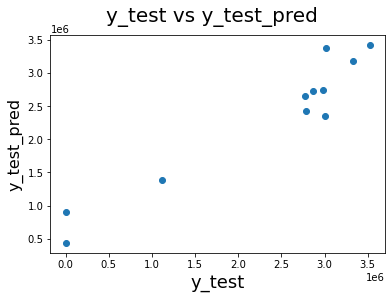

In [398]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a decent linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [399]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

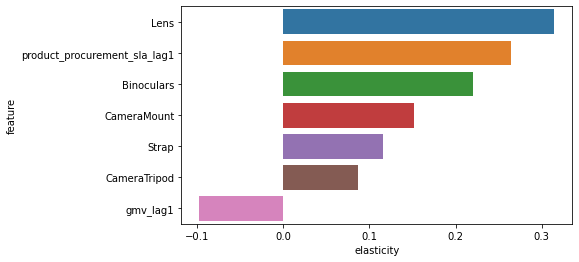

In [400]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### 2. Gaming Accessory - Distributed Lag Models

In [401]:
# Adding the lagged features
gamingAcc_model3 = getDistributedLagFeatures(gamingAcc_final)
gamingAcc_model3.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,sla_lag3,product_procurement_sla_lag1,product_procurement_sla_lag2,product_procurement_sla_lag3,discount_lag1,discount_lag2,discount_lag3,NPS_lag1,NPS_lag2,NPS_lag3
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,0.000000,3.208333,0.000000,0.000000,0.316250,0.000000,0.000000,54.599588,0.000000,0.000000
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,0.000000,3.245660,3.208333,0.000000,0.421543,0.316250,0.000000,54.599588,54.599588,0.000000
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,3.458333,2.721119,3.245660,3.208333,0.451228,0.421543,0.316250,54.599588,54.599588,54.599588
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,5.375094,2.592130,2.721119,3.245660,0.398009,0.451228,0.421543,54.599588,54.599588,54.599588


In [402]:
# dropping the features which are not in control of the company
gamingAcc_model3 = gamingAcc_model3.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [403]:
#Test-train split
df_train, df_test = train_test_split(gamingAcc_model3, train_size = 0.8, test_size = 0.2, random_state = 100)

In [404]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [405]:
gamingAcc_model3.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Spon

In [406]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
        'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [407]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [408]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['adStock_TV', 'adStock_ Affiliates', 'NPS', 'GamePad',
       'GamingAccessoryKit', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'adStock_TV_lag2',
       'adStock_Digital_lag2', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag3', 'adStock_SEM_lag1',
       'adStock_SEM_lag2', 'sla_lag1', 'product_procurement_sla_lag1',
       'discount_lag2', 'NPS_lag3'],
      dtype='object')

In [409]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [410]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     218.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.16e-20
Time:                        17:00:31   Log-Likelihood:                -527.60
No. Observations:                  42   AIC:                             1097.
Df Residuals:                      21   BIC:                             1134.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,195.91
16,adStock_SEM_lag2,84.49
15,adStock_SEM_lag1,64.64
12,adStock_Digital_lag2,62.24
13,adStock_Content Marketing_lag1,44.65
19,discount_lag2,31.74
2,adStock_ Affiliates,28.17
3,NPS,19.92
11,adStock_TV_lag2,18.23
17,sla_lag1,16.30


In [411]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Digital_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.94e-21
Time:                        17:00:31   Log-Likelihood:                -527.97
No. Observations:                  42   AIC:                             1096.
Df Residuals:                      22   BIC:                             1131.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,192.42
14,adStock_SEM_lag1,63.17
12,adStock_Content Marketing_lag1,44.02
18,discount_lag2,30.52
15,adStock_SEM_lag2,27.96
2,adStock_ Affiliates,22.34
3,NPS,19.67
11,adStock_TV_lag2,18.01
16,sla_lag1,16.26
10,GamingMousePad,10.68


In [412]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["adStock_Content Marketing_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.67e-22
Time:                        17:00:31   Log-Likelihood:                -529.86
No. Observations:                  42   AIC:                             1098.
Df Residuals:                      23   BIC:                             1131.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,191.63
17,discount_lag2,30.50
14,adStock_SEM_lag2,27.02
2,adStock_ Affiliates,21.67
3,NPS,19.48
11,adStock_TV_lag2,17.48
15,sla_lag1,16.26
13,adStock_SEM_lag1,14.08
10,GamingMousePad,10.67
7,GamingKeyboard,9.86


In [413]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["adStock_SEM_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     260.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.76e-23
Time:                        17:00:31   Log-Likelihood:                -530.17
No. Observations:                  42   AIC:                             1096.
Df Residuals:                      24   BIC:                             1128.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,190.87
16,discount_lag2,29.12
2,adStock_ Affiliates,19.29
3,NPS,19.27
11,adStock_TV_lag2,16.04
14,sla_lag1,15.60
10,GamingMousePad,10.35
13,adStock_SEM_lag2,10.14
7,GamingKeyboard,9.59
6,GamingHeadset,8.55


In [414]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_Content Marketing_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     245.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.92e-23
Time:                        17:00:31   Log-Likelihood:                -533.45
No. Observations:                  42   AIC:                             1101.
Df Residuals:                      25   BIC:                             1130.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,180.49
15,discount_lag2,28.87
3,NPS,17.60
2,adStock_ Affiliates,16.97
13,sla_lag1,15.36
11,adStock_TV_lag2,13.94
10,GamingMousePad,10.19
7,GamingKeyboard,9.58
6,GamingHeadset,8.55
4,GamePad,7.96


In [415]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["adStock_TV"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.97e-24
Time:                        17:00:31   Log-Likelihood:                -536.40
No. Observations:                  42   AIC:                             1105.
Df Residuals:                      26   BIC:                             1133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,138.09
14,discount_lag2,24.14
1,adStock_ Affiliates,16.04
12,sla_lag1,13.18
2,NPS,11.64
9,GamingMousePad,10.03
6,GamingKeyboard,9.20
5,GamingHeadset,8.55
8,GamingMouse,7.76
3,GamePad,7.33


In [416]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["adStock_TV_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.82e-24
Time:                        17:00:31   Log-Likelihood:                -539.38
No. Observations:                  42   AIC:                             1109.
Df Residuals:                      27   BIC:                             1135.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,107.33
13,discount_lag2,23.36
11,sla_lag1,12.58
6,GamingKeyboard,9.18
9,GamingMousePad,8.90
2,NPS,8.37
8,GamingMouse,7.60
3,GamePad,7.33
14,NPS_lag3,6.94
5,GamingHeadset,6.64


In [417]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["adStock_ Affiliates"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     243.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.22e-25
Time:                        17:00:31   Log-Likelihood:                -540.32
No. Observations:                  42   AIC:                             1109.
Df Residuals:                      28   BIC:                             1133.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,103.62
12,discount_lag2,22.28
10,sla_lag1,11.53
5,GamingKeyboard,8.95
8,GamingMousePad,8.64
1,NPS,8.05
7,GamingMouse,7.56
2,GamePad,7.29
13,NPS_lag3,6.81
3,GamingAccessoryKit,4.98


In [418]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     260.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.90e-26
Time:                        17:00:31   Log-Likelihood:                -541.37
No. Observations:                  42   AIC:                             1109.
Df Residuals:                      29   BIC:                             1131.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,39.04
11,discount_lag2,8.88
7,GamingMousePad,7.46
6,GamingMouse,6.08
9,sla_lag1,5.25
1,GamePad,5.05
4,GamingKeyboard,5.01
2,GamingAccessoryKit,4.97
12,NPS_lag3,4.56
3,GamingHeadset,4.13


In [419]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["adStock_SEM_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     282.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.81e-27
Time:                        17:00:31   Log-Likelihood:                -542.14
No. Observations:                  42   AIC:                             1108.
Df Residuals:                      30   BIC:                             1129.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,38.61
10,discount_lag2,8.06
7,GamingMousePad,7.39
8,sla_lag1,4.88
1,GamePad,4.39
4,GamingKeyboard,4.33
6,GamingMouse,4.30
3,GamingHeadset,4.13
2,GamingAccessoryKit,3.93
11,NPS_lag3,3.86


In [420]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v11 = X_train_v10.drop(["discount_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     278.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.81e-27
Time:                        17:00:32   Log-Likelihood:                -545.10
No. Observations:                  42   AIC:                             1112.
Df Residuals:                      31   BIC:                             1131.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,37.64
7,GamingMousePad,6.88
6,GamingMouse,4.23
1,GamePad,4.00
4,GamingKeyboard,3.97
2,GamingAccessoryKit,3.53
3,GamingHeadset,3.25
8,sla_lag1,2.55
9,product_procurement_sla_lag1,2.10
10,NPS_lag3,2.09


In [421]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["sla_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     311.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.49e-28
Time:                        17:00:32   Log-Likelihood:                -545.66
No. Observations:                  42   AIC:                             1111.
Df Residuals:                      32   BIC:                             1129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,36.60
7,GamingMousePad,6.87
6,GamingMouse,4.17
1,GamePad,3.98
4,GamingKeyboard,3.95
2,GamingAccessoryKit,3.33
3,GamingHeadset,3.19
9,NPS_lag3,1.88
8,product_procurement_sla_lag1,1.61
5,GamingMemoryCard,1.52


In [422]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v13 = X_train_v12.drop(["GamingMousePad"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     299.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.57e-28
Time:                        17:00:32   Log-Likelihood:                -549.53
No. Observations:                  42   AIC:                             1117.
Df Residuals:                      33   BIC:                             1133.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,const,36.07
1,GamePad,3.85
6,GamingMouse,3.40
4,GamingKeyboard,3.34
2,GamingAccessoryKit,3.30
3,GamingHeadset,2.84
8,NPS_lag3,1.74
7,product_procurement_sla_lag1,1.59
5,GamingMemoryCard,1.33


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Distributed Lag model.

### Model Evaluation (Distributed Lag Model)
#### Gaming Accessory

In [423]:
X_train_lm.columns

Index(['const', 'GamePad', 'GamingAccessoryKit', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'product_procurement_sla_lag1', 'NPS_lag3'],
      dtype='object')

In [424]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,GamePad,GamingAccessoryKit,GamingHeadset,GamingKeyboard,GamingMemoryCard,GamingMouse,product_procurement_sla_lag1,NPS_lag3
25,1.0,0.612525,0.690476,0.637781,0.194323,1.332604,0.239264,0.725527,0.766509
48,1.0,0.567210,0.741497,0.381409,0.266376,0.144420,0.202454,0.554197,0.788619
52,1.0,0.208248,0.350340,0.164618,0.150655,0.017505,0.062294,0.616449,0.842126
37,1.0,0.500000,0.721088,0.269265,0.296943,0.094092,0.129778,0.725722,0.838970
6,1.0,0.001018,0.000000,0.000300,0.000000,0.000000,0.000000,0.633867,0.910189
18,1.0,0.596232,0.724490,0.309445,0.192140,0.091904,0.391694,0.618674,0.740132
20,1.0,0.368126,0.629252,0.243478,0.122271,0.192560,0.092732,0.664355,0.745773
46,1.0,0.469450,0.676871,0.596702,0.251092,0.129103,0.145352,0.627409,0.857785
5,1.0,0.000509,0.000000,0.000300,0.000000,0.000000,0.000000,0.912059,0.910189
31,1.0,0.440428,0.459184,0.479460,0.246725,0.573304,0.169655,0.748131,0.785053


In [425]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [426]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9907647619554735

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

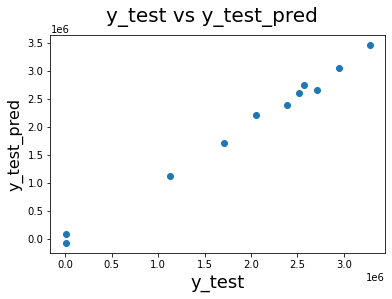

In [427]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [428]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

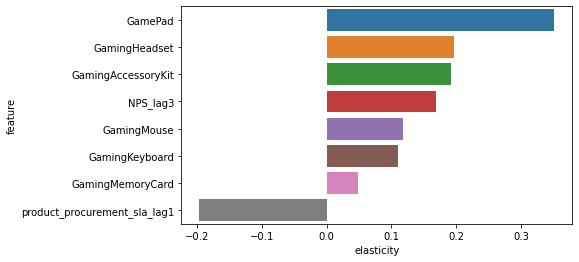

In [429]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

#### 3. Home Audio - Distributed Lag Models

In [430]:
# Adding the lagged features
homeAudio_model3 = getDistributedLagFeatures(homeAudio_final)
homeAudio_model3.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,sla_lag3,product_procurement_sla_lag1,product_procurement_sla_lag2,product_procurement_sla_lag3,discount_lag1,discount_lag2,discount_lag3,NPS_lag1,NPS_lag2,NPS_lag3
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,0.000000,3.718750,0.000000,0.000000,0.384688,0.000000,0.000000,54.599588,0.000000,0.000000
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,0.000000,2.797753,3.718750,0.000000,0.335811,0.384688,0.000000,54.599588,54.599588,0.000000
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,3.093750,2.723084,2.797753,3.718750,0.349612,0.335811,0.384688,54.599588,54.599588,54.599588
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,7.618513,2.802618,2.723084,2.797753,0.348036,0.349612,0.335811,54.599588,54.599588,54.599588


In [431]:
# dropping the features which are not in control of the company
homeAudio_model3 = homeAudio_model3.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [432]:
#Test-train split
df_train, df_test = train_test_split(homeAudio_model3, train_size = 0.8, test_size = 0.2, random_state = 100)

In [433]:
# Assigning the X_train, X_test, y_train & y_test values
y_train = df_train.pop('gmv')
X_train = df_train

y_test = df_test.pop('gmv')
X_test = df_test

In [434]:
homeAudio_model3.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumn_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online market

In [435]:
# Scaling all the numerical values
scaler = MinMaxScaler()
num_cols = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
        'total_special_sale_days', 
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_ Affiliates_lag1',
       'adStock_ Affiliates_lag2', 'adStock_ Affiliates_lag3',
       'adStock_SEM_lag1', 'adStock_SEM_lag2', 'adStock_SEM_lag3',
       'adStock_Other_lag1', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       'product_procurement_sla_lag1', 'product_procurement_sla_lag2',
       'product_procurement_sla_lag3', 'discount_lag1', 'discount_lag2',
       'discount_lag3', 'NPS_lag1', 'NPS_lag2', 'NPS_lag3']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Applying RFE for Feature Selection

In [436]:
# Executing RFE by limiting the features to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)           
rfe = rfe.fit(X_train, y_train)

In [437]:
# top 20 features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['adStock_Digital', 'adStock_Sponsorship', 'sla', 'discount', 'FMRadio',
       'HomeAudioSpeaker', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_Digital_lag3', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_SEM_lag2',
       'adStock_Other_lag1', 'gmv_lag1', 'gmv_lag2', 'sla_lag1', 'sla_lag2',
       'product_procurement_sla_lag2', 'discount_lag1', 'NPS_lag3'],
      dtype='object')

In [438]:
# Creating X_train_rfe dataframe with RFE selected features
X_train_rfe = X_train[cols]

In [439]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     756.1
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.82e-23
Time:                        17:00:33   Log-Likelihood:                -502.14
No. Observations:                  40   AIC:                             1046.
Df Residuals:                      19   BIC:                             1082.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,51.29
10,adStock_Online marketing_lag2,34.24
11,adStock_Online marketing_lag3,29.13
7,adStock_TV_lag1,28.40
8,adStock_TV_lag2,26.92
12,adStock_SEM_lag2,16.54
2,adStock_Sponsorship,12.17
9,adStock_Digital_lag3,10.57
6,HomeAudioSpeaker,10.55
1,adStock_Digital,10.08


In [440]:
# Removing the feature with higher p-value
X_train_v2 = X_train_rfe.drop(["adStock_Other_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v2)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     832.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.55e-25
Time:                        17:00:33   Log-Likelihood:                -502.27
No. Observations:                  40   AIC:                             1045.
Df Residuals:                      20   BIC:                             1078.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,51.29
10,adStock_Online marketing_lag2,29.16
8,adStock_TV_lag2,24.29
11,adStock_Online marketing_lag3,24.18
7,adStock_TV_lag1,23.56
12,adStock_SEM_lag2,16.53
9,adStock_Digital_lag3,10.00
6,HomeAudioSpeaker,9.79
1,adStock_Digital,9.67
16,sla_lag2,9.40


In [441]:
# Removing the feature with higher p-value
X_train_v3 = X_train_v2.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v3)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.35e-26
Time:                        17:00:33   Log-Likelihood:                -502.48
No. Observations:                  40   AIC:                             1043.
Df Residuals:                      21   BIC:                             1075.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,47.99
9,adStock_Online marketing_lag2,28.59
7,adStock_TV_lag2,24.28
10,adStock_Online marketing_lag3,24.18
6,adStock_TV_lag1,23.56
11,adStock_SEM_lag2,16.53
8,adStock_Digital_lag3,9.80
4,FMRadio,8.83
15,sla_lag2,8.71
5,HomeAudioSpeaker,8.60


In [442]:
# Removing the feature with higher p-value
X_train_v4 = X_train_v3.drop(["discount_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v4)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     946.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.51e-27
Time:                        17:00:33   Log-Likelihood:                -503.83
No. Observations:                  40   AIC:                             1044.
Df Residuals:                      22   BIC:                             1074.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,44.75
9,adStock_Online marketing_lag2,28.59
7,adStock_TV_lag2,24.20
6,adStock_TV_lag1,23.48
10,adStock_Online marketing_lag3,22.87
11,adStock_SEM_lag2,16.10
8,adStock_Digital_lag3,9.76
15,sla_lag2,8.70
5,HomeAudioSpeaker,7.94
4,FMRadio,7.77


In [443]:
# Removing the feature with higher p-value
X_train_v5 = X_train_v4.drop(["adStock_TV_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v5)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     968.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.16e-28
Time:                        17:00:33   Log-Likelihood:                -505.47
No. Observations:                  40   AIC:                             1045.
Df Residuals:                      23   BIC:                             1074.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,44.31
8,adStock_Online marketing_lag2,28.59
9,adStock_Online marketing_lag3,22.86
10,adStock_SEM_lag2,15.05
7,adStock_Digital_lag3,9.74
5,HomeAudioSpeaker,7.93
4,FMRadio,7.73
13,sla_lag1,7.35
14,sla_lag2,7.12
16,NPS_lag3,6.58


In [444]:
# Removing the feature with higher p-value
X_train_v6 = X_train_v5.drop(["adStock_TV_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v6)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1066.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.93e-30
Time:                        17:00:33   Log-Likelihood:                -505.69
No. Observations:                  40   AIC:                             1043.
Df Residuals:                      24   BIC:                             1070.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,42.81
7,adStock_Online marketing_lag2,28.23
8,adStock_Online marketing_lag3,22.79
9,adStock_SEM_lag2,14.78
6,adStock_Digital_lag3,9.27
5,HomeAudioSpeaker,7.85
4,FMRadio,7.71
12,sla_lag1,7.34
13,sla_lag2,7.06
15,NPS_lag3,6.56


In [445]:
# Removing the feature with higher p-value
X_train_v7 = X_train_v6.drop(["sla_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v7)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1141.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.87e-31
Time:                        17:00:33   Log-Likelihood:                -506.53
No. Observations:                  40   AIC:                             1043.
Df Residuals:                      25   BIC:                             1068.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,42.52
7,adStock_Online marketing_lag2,25.36
8,adStock_Online marketing_lag3,22.00
9,adStock_SEM_lag2,14.70
6,adStock_Digital_lag3,8.88
5,HomeAudioSpeaker,7.81
4,FMRadio,7.71
12,sla_lag1,7.24
13,product_procurement_sla_lag2,5.92
2,sla,5.30


In [446]:
# Removing the feature with higher p-value
X_train_v8 = X_train_v7.drop(["sla_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v8)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1139.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.26e-32
Time:                        17:00:33   Log-Likelihood:                -508.82
No. Observations:                  40   AIC:                             1046.
Df Residuals:                      26   BIC:                             1069.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,42.42
7,adStock_Online marketing_lag2,21.12
8,adStock_Online marketing_lag3,20.16
9,adStock_SEM_lag2,12.34
6,adStock_Digital_lag3,8.52
4,FMRadio,7.66
5,HomeAudioSpeaker,7.50
2,sla,4.00
3,discount,3.37
1,adStock_Sponsorship,2.55


In [447]:
# Removing the feature with higher p-value
X_train_v9 = X_train_v8.drop(["product_procurement_sla_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v9)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1210.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.32e-33
Time:                        17:00:33   Log-Likelihood:                -509.97
No. Observations:                  40   AIC:                             1046.
Df Residuals:                      27   BIC:                             1068.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,40.83
7,adStock_Online marketing_lag2,21.11
8,adStock_Online marketing_lag3,20.07
9,adStock_SEM_lag2,12.34
6,adStock_Digital_lag3,8.42
4,FMRadio,7.65
5,HomeAudioSpeaker,7.50
2,sla,3.89
3,discount,3.36
1,adStock_Sponsorship,2.54


In [448]:
# Removing the feature with higher p-value
X_train_v10 = X_train_v9.drop(["gmv_lag1"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v10)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.29e-34
Time:                        17:00:33   Log-Likelihood:                -512.67
No. Observations:                  40   AIC:                             1049.
Df Residuals:                      28   BIC:                             1070.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,38.37
7,adStock_Online marketing_lag2,20.84
8,adStock_Online marketing_lag3,19.05
9,adStock_SEM_lag2,10.85
6,adStock_Digital_lag3,8.11
5,HomeAudioSpeaker,7.44
4,FMRadio,7.23
3,discount,3.11
2,sla,2.92
1,adStock_Sponsorship,2.45


In [449]:
# Removing the feature with higher p-value
X_train_v11 = X_train_v10.drop(["sla"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v11)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1288.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.35e-35
Time:                        17:00:33   Log-Likelihood:                -513.79
No. Observations:                  40   AIC:                             1050.
Df Residuals:                      29   BIC:                             1068.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,21.12
6,adStock_Online marketing_lag2,19.56
7,adStock_Online marketing_lag3,17.13
8,adStock_SEM_lag2,10.43
5,adStock_Digital_lag3,7.62
4,HomeAudioSpeaker,7.40
3,FMRadio,5.56
2,discount,2.64
1,adStock_Sponsorship,2.30
9,gmv_lag2,1.83


In [450]:
# Removing the feature with higher p-value
X_train_v12 = X_train_v11.drop(["discount"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v12)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1391.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.57e-37
Time:                        17:00:33   Log-Likelihood:                -515.03
No. Observations:                  40   AIC:                             1050.
Df Residuals:                      30   BIC:                             1067.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,18.57
5,adStock_Online marketing_lag2,17.09
6,adStock_Online marketing_lag3,15.36
7,adStock_SEM_lag2,9.70
4,adStock_Digital_lag3,6.78
3,HomeAudioSpeaker,3.89
2,FMRadio,3.82
1,adStock_Sponsorship,2.28
8,gmv_lag2,1.82
9,NPS_lag3,1.52


In [451]:
# Removing the feature with higher p-value
X_train_v13 = X_train_v12.drop(["gmv_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v13)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1491.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           7.25e-38
Time:                        17:00:33   Log-Likelihood:                -516.66
No. Observations:                  40   AIC:                             1051.
Df Residuals:                      31   BIC:                             1067.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,18.55
5,adStock_Online marketing_lag2,16.98
6,adStock_Online marketing_lag3,15.36
7,adStock_SEM_lag2,9.58
4,adStock_Digital_lag3,6.74
3,HomeAudioSpeaker,3.89
2,FMRadio,3.81
1,adStock_Sponsorship,2.19
8,NPS_lag3,1.42


In [452]:
# Removing the feature with higher p-value
X_train_v14 = X_train_v13.drop(["NPS_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v14)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.05e-38
Time:                        17:00:34   Log-Likelihood:                -518.97
No. Observations:                  40   AIC:                             1054.
Df Residuals:                      32   BIC:                             1067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
5,adStock_Online marketing_lag2,16.61
6,adStock_Online marketing_lag3,15.36
0,const,12.87
7,adStock_SEM_lag2,9.01
4,adStock_Digital_lag3,6.54
3,HomeAudioSpeaker,3.89
2,FMRadio,3.79
1,adStock_Sponsorship,2.02


In [453]:
# Removing the feature with higher p-value
X_train_v15 = X_train_v14.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v15)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1739.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.64e-40
Time:                        17:00:34   Log-Likelihood:                -520.57
No. Observations:                  40   AIC:                             1055.
Df Residuals:                      33   BIC:                             1067.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
4,adStock_Online marketing_lag2,16.07
5,adStock_Online marketing_lag3,14.98
0,const,12.87
6,adStock_SEM_lag2,7.22
3,adStock_Digital_lag3,5.40
2,HomeAudioSpeaker,3.35
1,FMRadio,3.03


In [454]:
# Removing the feature with higher p-value
X_train_v16 = X_train_v15.drop(["adStock_SEM_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v16)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2065.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.49e-41
Time:                        17:00:34   Log-Likelihood:                -521.38
No. Observations:                  40   AIC:                             1055.
Df Residuals:                      34   BIC:                             1065.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
4,adStock_Online marketing_lag2,14.48
5,adStock_Online marketing_lag3,14.07
0,const,12.15
1,FMRadio,3.03
2,HomeAudioSpeaker,2.92
3,adStock_Digital_lag3,1.32


In [455]:
# Removing the feature with higher p-value
X_train_v17 = X_train_v16.drop(["adStock_Digital_lag3"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v17)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2508.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.72e-42
Time:                        17:00:34   Log-Likelihood:                -522.52
No. Observations:                  40   AIC:                             1055.
Df Residuals:                      35   BIC:                             1063.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
3,adStock_Online marketing_lag2,14.40
4,adStock_Online marketing_lag3,14.01
0,const,11.58
2,HomeAudioSpeaker,2.77
1,FMRadio,2.71


In [456]:
# Since all p-values look good hence removing the feature with higher VIF
X_train_v18 = X_train_v17.drop(["adStock_Online marketing_lag2"], axis = 1)

# Add a constant
X_train_lm = sm.add_constant(X_train_v18)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

# checking the VIF of each of the features
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3032.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.58e-43
Time:                        17:00:34   Log-Likelihood:                -525.03
No. Observations:                  40   AIC:                             1058.
Df Residuals:                      36   BIC:                             1065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
0,const,11.50
2,HomeAudioSpeaker,2.70
1,FMRadio,2.61
3,adStock_Online marketing_lag3,1.15


After multiple iterations of fine-tuning the model with manual feature eliminations, we have reached a stable & statistically significant model where the p-values & VIFs of all the features are within the acceptable range. Hence, we can consider this as our FINAL Distributed Lag model.

### Model Evaluation (Distributed Lag Model)
#### Home Audio

In [457]:
X_train_lm.columns

Index(['const', 'FMRadio', 'HomeAudioSpeaker',
       'adStock_Online marketing_lag3'],
      dtype='object')

In [458]:
# preparing the X-test data features for model Evaluation & Predictions
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,FMRadio,HomeAudioSpeaker,adStock_Online marketing_lag3
6,1.0,0.346761,0.174147,0.053034
36,1.0,0.299368,0.186969,0.670209
37,1.0,0.301738,0.158378,0.642814
28,1.0,0.373618,0.424536,0.911846
43,1.0,0.229068,0.159244,0.843747
49,1.0,0.067141,0.079016,0.440090
5,1.0,-0.001580,-0.004332,0.049498
33,1.0,0.416272,0.369433,0.848599
20,1.0,0.350711,0.407382,0.830311
42,1.0,0.266983,0.178479,0.689337


In [459]:
# Making predictions using the final model
y_test_pred = lr.predict(X_test)

In [460]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9928585067305026

For this model, the R-Square for the predictions made on the test data remain very close to that of train dataset. Hence, we can conclude this as the stable additive model.

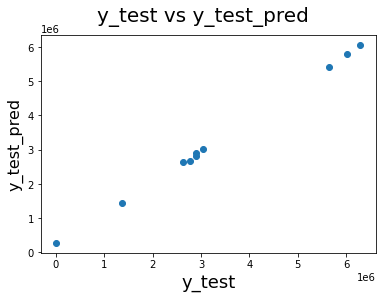

In [461]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

#### Elasticity

In [462]:
coefficients = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients.columns = ['feature','coefficient']
elasticity = getElasticity(X_train_lm, y_train, coefficients)

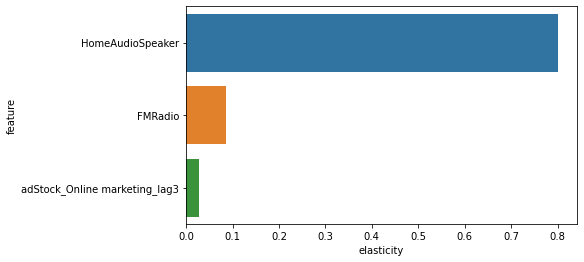

In [463]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity.sort_values('elasticity', ascending = False))
plt.show()

## 6. Recommendations

### 1. Camera Accessory
- ElecKart should promote products like - Filter, Camera Battery, Binoculars, Strap & Camera Tripod as it has a very positive & incremental impact on the overall Revenue(GMV) growth.
- More marketing efforts should be spent on the promotion of Premium products.
- For marketing & products promotion, it’s a good idea to invest more in Online Marketing channels as it has shown a positive impact in boosting the overall revenue for the company.
- A slight increase in product discounts could also help to increase the sales marginally.

### 2. Gaming Accessory
- ElecKart should promote products like – GamePad, Gaming Headset, Gaming Mouse, Gaming Memory Cards & Accessory Kits as they fetch the highest revenue(GMV) for the company.
- Marketing & Advertising spends on TV should be slightly increased as it has a positive impact on the revenue.
- An increase in NPS scores for the last 3 weeks has also contributed positively to the revenue growth of the business.
- Product Procurement SLA should be reduced for the last 1 week.

### 3. Home Audio
- ElecKart should promote products like – Home Audio Speakers & FM Radio as they have shown a significant positive impact on revenue(GMV) growth (especially through the sale of Home Audio Speakers) of the company.
- Marketing & Advertising spends on Online Marketing channels for the last 3 weeks should be slightly increased as it can contribute to the revenue growth marginally.
- Even if in case the SLA increases slightly, it hasn’t negatively affected the revenue growth for the business.

## Thank You!

```

```

